In [ ]:
!pip install pyquery

In [ ]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install colorama

In [ ]:
!python3 -m pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
! pip install -q scikit-plot

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log
from colorama import Fore
from urllib.parse import urlparse
from tld import get_tld, is_tld
from re import compile
from urllib.parse import urlparse
from socket import gethostbyname
from pyquery import PyQuery

import scikitplot as skplt
from requests import get
from json import dump
from string import ascii_lowercase
from numpy import array
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.python.util import deprecation
from tensorflow.keras.utils import to_categorical
import gc
import random
import os
import pickle
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models, layers, backend, metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, classification_report
from sklearn.preprocessing import label_binarize


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Big Data/Project/malicious_phish.csv')

In [ ]:
df.head()

url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

In [ ]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
count = df.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

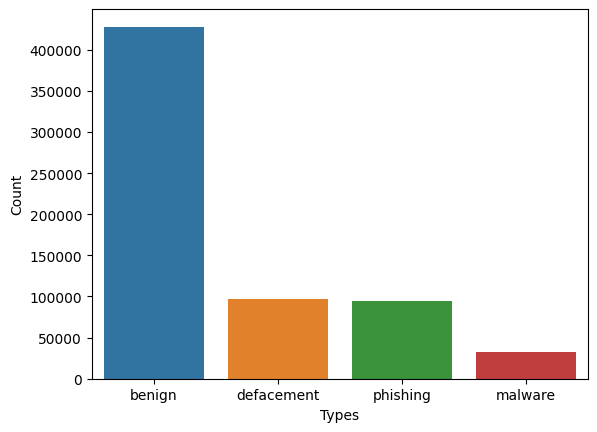

In [ ]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

#Preprocessing

In [ ]:
#df['url'] = df['url'].replace('www.', '', regex=True)
#df

In [ ]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
df['Category'] = df['type']
df = df.replace(rem)
df.head()

url        type  Category
0                                   br-icloud.com.br    phishing         2
1                mp3raid.com/music/krizz_kaliko.html      benign         0
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1

#Feature Extraction

In [ ]:
df['url_len'] = df['url'].apply(lambda x: len(str(x)))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len  
0       16  
1       35  
2       31  
3       88  
4      235

In [ ]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain
df['domain'] = df['url'].apply(lambda i: process_tld(i))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  
0       16         br-icloud.com.br  
1       35              mp3raid.com  
2       31           bopsecrets.org  
3       88    www.garage-pirenne.be  
4      235  adventure-nicaragua.net

In [ ]:
features= ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for feature in features:
    df[feature] = df['url'].apply(lambda i: i.count(feature))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  #  %  +  $  !  *  ,  //  
0       16         br-icloud.com.br  0  0  1  0  2  0  0  0  0  0  0  0   0  
1       35              mp3raid.com  0  0  0  0  2  0  0  0  0  0  0  0   0  
2       31           bopsecrets.org  0  0  0  0  2  0  0  0  0  0  0  0   0  
3       88    www.garage-pirenne.be  0  1  1  4  3  0  0  0  0  0  0  0   1  
4      235  adventure-nicaragua.net  0  1  1  3  2  0  0  0  0  0  0  0   1

In [ ]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['https'] = df['url'].apply(lambda i: httpSecure(i))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  #  %  +  $  !  *  ,  //  \
0       16         br-icloud.com.br  0  0  1  0  2  0  0  0  0  0  0  0   0   
1       35              mp3raid.com  0  0  0  0  2  0  0  0  0  0  0  0   0   
2       31           bopsecrets.org  0  0  0  0  2  0  0  0  0  0  0  0   0   
3       88    www.garage-pirenne.be  0  1  1  4  3  0  0  0  0  0  0  0   1   
4      235  adventure-nicaragua.net  0  1  1  3  2  0  0  0  0  0  0  0   1   

   https  
0      0  
1      0  
2      0  
3      0  
4      0

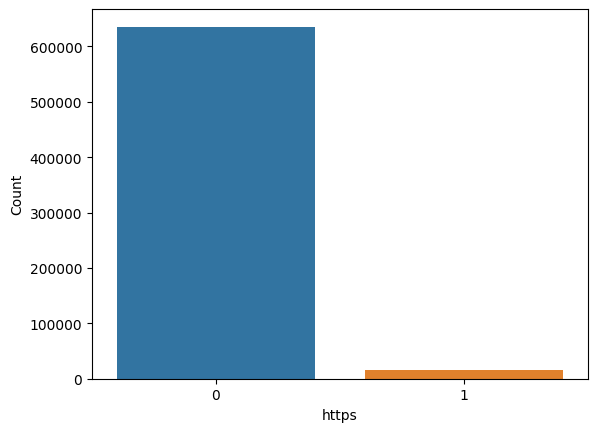

In [ ]:
count=df.https.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('https')
plt.ylabel('Count');

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['digits']= df['url'].apply(lambda i: digit_count(i))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  #  %  +  $  !  *  ,  //  \
0       16         br-icloud.com.br  0  0  1  0  2  0  0  0  0  0  0  0   0   
1       35              mp3raid.com  0  0  0  0  2  0  0  0  0  0  0  0   0   
2       31           bopsecrets.org  0  0  0  0  2  0  0  0  0  0  0  0   0   
3       88    www.garage-pirenne.be  0  1  1  4  3  0  0  0  0  0  0  0   1   
4      235  adventure-nicaragua.net  0  1  1  3  2  0  0  0  0  0  0  0   1   

   https  digits  
0      0       0  
1      0       1  
2      0       1  
3      0       7  
4      0      22

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['letters']= df['url'].apply(lambda i: letter_count(i))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  %  +  $  !  *  ,  //  \
0       16         br-icloud.com.br  0  0  1  0  2  ...  0  0  0  0  0  0   0   
1       35              mp3raid.com  0  0  0  0  2  ...  0  0  0  0  0  0   0   
2       31           bopsecrets.org  0  0  0  0  2  ...  0  0  0  0  0  0   0   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...  0  0  0  0  0  0   1   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...  0  0  0  0  0  0   1   

   https  digits  letters  
0      0       0       13  
1      0       1       29  
2      0       1       25  
3      0       7       63  
4      0      22      199  

[5 rows x 21 columns]

In [ ]:
def Shortening_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['Shortening_Service'] = df['url'].apply(lambda x: Shortening_Service(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  +  $  !  *  ,  //  \
0       16         br-icloud.com.br  0  0  1  0  2  ...  0  0  0  0  0   0   
1       35              mp3raid.com  0  0  0  0  2  ...  0  0  0  0  0   0   
2       31           bopsecrets.org  0  0  0  0  2  ...  0  0  0  0  0   0   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...  0  0  0  0  0   1   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...  0  0  0  0  0   1   

   https  digits  letters  Shortening_Service  
0      0       0       13                   0  
1      0       1       29                   0  
2      0       1       25                   0  
3      0       7       63                   0  
4      0      22      199                   0  

[5 rows x 22 columns]

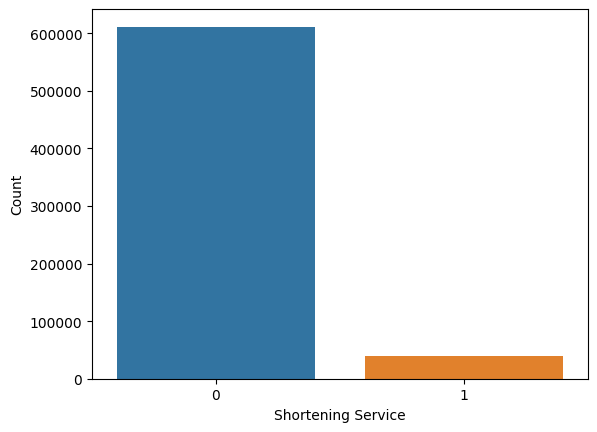

In [ ]:
count=df.Shortening_Service.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Shortening Service')
plt.ylabel('Count');

In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(re.escape(hostname), url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['Abnormal_URL'] = df['url'].apply(lambda x: abnormal_url(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  $  !  *  ,  //  \
0       16         br-icloud.com.br  0  0  1  0  2  ...  0  0  0  0   0   
1       35              mp3raid.com  0  0  0  0  2  ...  0  0  0  0   0   
2       31           bopsecrets.org  0  0  0  0  2  ...  0  0  0  0   0   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...  0  0  0  0   1   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...  0  0  0  0   1   

   https  digits  letters  Shortening_Service  Abnormal_URL  
0      0       0       13                   0             0  
1      0       1       29                   0             0  
2      0       1       25                   0             0  
3      0       7       63                   0             1  
4      0      22      199                   0             1  

[5 rows x 23 columns]

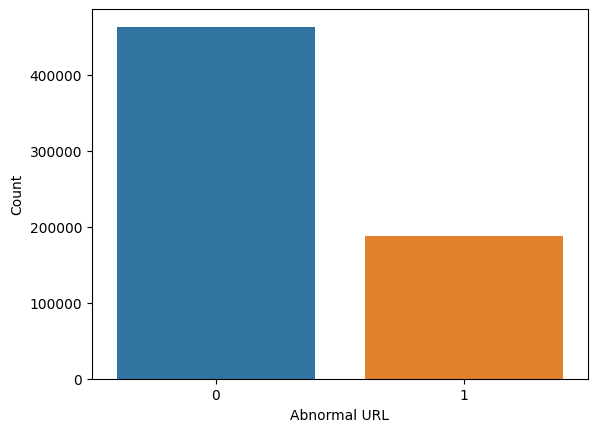

In [ ]:
count=df.Abnormal_URL.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Abnormal URL')
plt.ylabel('Count');

In [ ]:
def is_url_ip_address(url: str) -> bool:
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

df['is_ip'] = df['url'].apply(lambda i: is_url_ip_address(i))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  !  *  ,  //  https  \
0       16         br-icloud.com.br  0  0  1  0  2  ...  0  0  0   0      0   
1       35              mp3raid.com  0  0  0  0  2  ...  0  0  0   0      0   
2       31           bopsecrets.org  0  0  0  0  2  ...  0  0  0   0      0   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...  0  0  0   1      0   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...  0  0  0   1      0   

   digits  letters  Shortening_Service  Abnormal_URL  is_ip  
0       0       13                   0             0      0  
1       1       29                   0             0      0  
2       1       25                   0             0      0  
3       7       63                   0             1      0  
4      22      199                   0             1      0  

[5 rows x 24 columns]

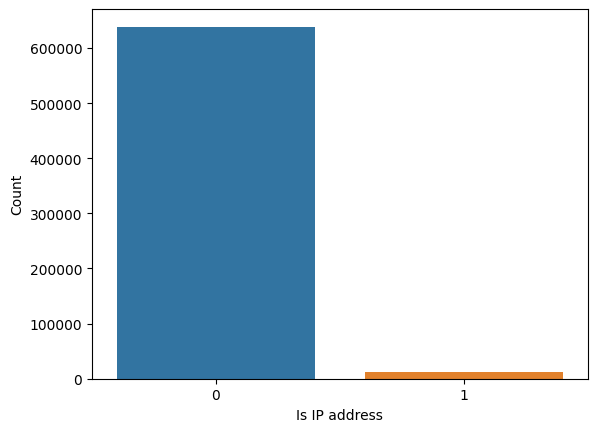

In [ ]:
count=df.is_ip.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Is IP address')
plt.ylabel('Count');

In [ ]:
def get_url_path(url: str) :
    """
    Get's the path from a URL

    For example:

    If the URL was "www.google.co.uk/my/great/path"

    The path returned would be "my/great/path"
    """
    try:
        res = get_tld(url, as_object = True, fail_silently=False, fix_protocol=True)
        if res.parsed_url.query:
            joined = res.parsed_url.path + res.parsed_url.query
            return joined
        else:
            return res.parsed_url.path
    except:
        return None
df['url_path'] = df['url'].apply(lambda x: get_url_path(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  *  ,  //  https  \
0       16         br-icloud.com.br  0  0  1  0  2  ...  0  0   0      0   
1       35              mp3raid.com  0  0  0  0  2  ...  0  0   0      0   
2       31           bopsecrets.org  0  0  0  0  2  ...  0  0   0      0   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...  0  0   1      0   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...  0  0   1      0   

   digits  letters  Shortening_Service  Abnormal_URL  is_ip  \
0       0       13                   0             0      0   
1       1       29                   0             0      0   
2       1       25                   0             0      0   
3       7       63                   0             1      0   
4      22      199                   0             1      0   

                                            url_path  
0                                                     
1                           /music/krizz_kaliko.html  
2                                  /rexroth/cr/1.htm  
3  /index.phpoption=com_content&view=article&id=7...  
4  /index.phpoption=com_mailto&tmpl=component&lin...  

[5 rows x 25 columns]

In [ ]:

df['url_path_len'] = df['url_path'].apply(lambda x: len(str(x)))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  ,  //  https  digits  \
0       16         br-icloud.com.br  0  0  1  0  2  ...  0   0      0       0   
1       35              mp3raid.com  0  0  0  0  2  ...  0   0      0       1   
2       31           bopsecrets.org  0  0  0  0  2  ...  0   0      0       1   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...  0   1      0       7   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...  0   1      0      22   

   letters  Shortening_Service  Abnormal_URL  is_ip  \
0       13                   0             0      0   
1       29                   0             0      0   
2       25                   0             0      0   
3       63                   0             1      0   
4      199                   0             1      0   

                                            url_path  url_path_len  
0                                                                0  
1                           /music/krizz_kaliko.html            24  
2                                  /rexroth/cr/1.htm            17  
3  /index.phpoption=com_content&view=article&id=7...            59  
4  /index.phpoption=com_mailto&tmpl=component&lin...           204  

[5 rows x 26 columns]

In [ ]:
def count_dir_in_url_path(url_path):
    """
    Counts number of / in url path to count number of
    sub directories
    """
    if url_path:
        n_dirs = url_path.count('/')
        return n_dirs
    else:
        return 0
df['count_dir_in_url_path'] = df['url_path'].apply(lambda x: count_dir_in_url_path(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  //  https  digits  \
0       16         br-icloud.com.br  0  0  1  0  2  ...   0      0       0   
1       35              mp3raid.com  0  0  0  0  2  ...   0      0       1   
2       31           bopsecrets.org  0  0  0  0  2  ...   0      0       1   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...   1      0       7   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...   1      0      22   

   letters  Shortening_Service  Abnormal_URL  is_ip  \
0       13                   0             0      0   
1       29                   0             0      0   
2       25                   0             0      0   
3       63                   0             1      0   
4      199                   0             1      0   

                                            url_path  url_path_len  \
0                                                                0   
1                           /music/krizz_kaliko.html            24   
2                                  /rexroth/cr/1.htm            17   
3  /index.phpoption=com_content&view=article&id=7...            59   
4  /index.phpoption=com_mailto&tmpl=component&lin...           204   

   count_dir_in_url_path  
0                      0  
1                      2  
2                      3  
3                      1  
4                      1  

[5 rows x 27 columns]

In [ ]:
def get_first_dir_len(url_path) :
    """
    Counts the length of the first directory within
    the URL provided
    """
    if url_path:
        if len(url_path.split('/')) > 1:
            first_dir_len = len(url_path.split('/')[1])
            return first_dir_len
    else:
        return 0
df['first_dir_len'] = df['url_path'].apply(lambda x: get_first_dir_len(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len                   domain  @  ?  -  =  .  ...  https  digits  \
0       16         br-icloud.com.br  0  0  1  0  2  ...      0       0   
1       35              mp3raid.com  0  0  0  0  2  ...      0       1   
2       31           bopsecrets.org  0  0  0  0  2  ...      0       1   
3       88    www.garage-pirenne.be  0  1  1  4  3  ...      0       7   
4      235  adventure-nicaragua.net  0  1  1  3  2  ...      0      22   

   letters  Shortening_Service  Abnormal_URL  is_ip  \
0       13                   0             0      0   
1       29                   0             0      0   
2       25                   0             0      0   
3       63                   0             1      0   
4      199                   0             1      0   

                                            url_path  url_path_len  \
0                                                                0   
1                           /music/krizz_kaliko.html            24   
2                                  /rexroth/cr/1.htm            17   
3  /index.phpoption=com_content&view=article&id=7...            59   
4  /index.phpoption=com_mailto&tmpl=component&lin...           204   

   count_dir_in_url_path  first_dir_len  
0                      0            0.0  
1                      2            5.0  
2                      3            7.0  
3                      1           58.0  
4                      1          203.0  

[5 rows x 28 columns]

In [ ]:
def process_tld(url: str, fix_protos: bool = False):
    """
    Takes a URL string and uses the tld library to extract subdomain, domain, top
    level domain and full length domain
    """
    res = get_tld(url, as_object = True, fail_silently=False, fix_protocol=fix_protos)

    subdomain = res.subdomain
    domain = res.domain
    tld = res.tld
    fld = res.fld

    return subdomain, domain, tld, fld

def process_url_with_tld(row: pd.Series):
    """
    Takes in a dataframe row, checks to see if rows `is_ip` column is
    False. If it is false, continues to process the URL and extract the
    features, otherwise sets four features to None before returning.

    This processing is wrapped in a try/except block to enable debugging
    and it prints out the inputs that caused a failure as well as a
    failure counter.
    """
    try:
        if row['is_ip'] == 0:
            if str(row['url']).startswith('http:'):
                return process_tld(row['url'])
            else:
                return process_tld(row['url'], fix_protos=True)
        else:
            subdomain = None
            domain = None
            tld = None
            fld = None
            return subdomain, domain, tld, fld
    except:
        idx = row.name
        url = row['url']
        type = row['type']
        print(f'Failed - {idx}: {url} is a {type} example')
        return None, None, None, None


df[['subdomain', 'domain', 'tld', 'fld']] = df.apply(lambda x: process_url_with_tld(x), axis=1, result_type="expand")



Failed - 555301: www.udc.an/wp-includes/js/tinymce/themes/advanced/img/link.htm is a benign example
Failed - 555675: www.udc.an/wp-includes/js/tinymce/themes/advanced/js/frm.htm is a benign example
Failed - 555800: 772050312/www1.royalbank.com/cgi-bin/rbaccess/rbunxcgi/ is a benign example
Failed - 567197: bin/webscr?cmd=_login- is a benign example
Failed - 573418: wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË
jlÛW¿]ø¾µj¿;·ªo!ÒPì ·ÊïH§#'3ø@CÄRõ²çÇÝ®öQBÇÆg`ÈåZéê DîÂm®ÎÝQó*x;9?ÁÒâbùtÖÙ®mÞNP¯°^MQ
(-§;¬ÔAèUèé\¨øíÌdB\[q½=ÿVuÃ»râæHäô/µ}»7!2=´ÂÏ4¿ª¡j91] is a phishing example
Failed - 573419: 'www.institutocgr.coo/web/media/syqvem/dk-óij!R\gr0âÕ5dfe<á<cmg&¤Gh!C<ò¡B-¨¨¼ ¬é'?l pýl ÖÒ%ÓaéþùkzHü]z?¹¯úT£bùÙî¬©àæÌì*UA×$Ë]õ³¯=Íÿ×ùÁÌý¡(~¶Ar¤÷G\$ðQñº¤KÎåcãÇ +¿Èôäþ(¹÷ sóQ¦NvO4zcÍÐGEõÂÚÃß=.¹ÏßZH{2-®tò¾VX©½½qx¼NÚPmødXæ&Ý»AnÂéa¶A¹®cÐBìß)aÚý^¨'JLî^ ¶ M¹´xxÃu4À@xýe^bÓ¡¹´ÞO7 is a phishing example
Failed

In [ ]:
df['subdomain'].isna().sum()

12578

In [ ]:
df[['subdomain', 'domain', 'tld', 'fld']].isna().sum()[0] -  df['is_ip'].value_counts()[1]

90

In [ ]:
df.isna().sum()

url                          0
type                         0
Category                     0
url_len                      0
domain                   12578
@                            0
?                            0
-                            0
=                            0
.                            0
#                            0
%                            0
+                            0
$                            0
!                            0
*                            0
,                            0
//                           0
https                        0
digits                       0
letters                      0
Shortening_Service           0
Abnormal_URL                 0
is_ip                        0
url_path                 12217
url_path_len                 0
count_dir_in_url_path        0
first_dir_len               14
subdomain                12578
tld                      12578
fld                      12578
dtype: int64

In [ ]:
df[['subdomain', 'domain', 'tld', 'fld']].isna().sum(), df['is_ip'].value_counts()

(subdomain    12578
 domain       12578
 tld          12578
 fld          12578
 dtype: int64,
 0    638703
 1     12488
 Name: is_ip, dtype: int64)

In [ ]:
df[['subdomain', 'domain', 'tld', 'fld']].value_counts()

subdomain  domain               tld   fld                    
en         wikipedia            org   wikipedia.org              13206
           youtube              com   youtube.com                 8617
           facebook             com   facebook.com                7735
           amazon               com   amazon.com                  4618
           9779                 info  9779.info                   3984
                                                                 ...  
           montecassinosociety  org   montecassinosociety.org        1
           montecitoweddings    com   montecitoweddings.com          1
           montecristorecords   com   montecristorecords.com         1
           montega-uhren        ch    montega-uhren.ch               1
zzz        zggg                 com   zggg.com                       1
Length: 191417, dtype: int64

In [ ]:
df['subdomain_len'] = df['subdomain'].apply(lambda x: len(str(x)))
df['tld_len'] = df['tld'].apply(lambda x: len(str(x)))
df['fld_len'] = df['fld'].apply(lambda x: len(str(x)))

In [ ]:
df['url_puncs'] = (df['url_len'] - (df['letters'] + df['digits']))
# Binned Features
groups = ['Short', 'Medium', 'Long', 'Very Long']
# URL Lengths in 4 bins
df['url_len_q'] = pd.qcut(df['url_len'], q=4, labels=groups)
# FLD Lengths in 4 bins
df['fld_len_q'] = pd.qcut(df['fld_len'], q=4, labels=groups)

# Percentage Features
df['pc_alphas'] = df['letters'] / df['url_len']
df['pc_digits'] = df['digits'] / df['url_len']
df['pc_puncs'] = df['url_puncs'] / df['url_len']

# Added by sjy
df['hostname_len'] = df['subdomain_len'] + df['fld_len'] + 1

In [ ]:
df.to_csv('feature_extracted.csv')

In [ ]:
def url_has_port_in_string(url):
      has_port = urlparse(url).netloc.split(':')
      return len(has_port) > 1 and has_port[-1].isdigit()
df['has_port_no'] = df['url'].apply(lambda x: url_has_port_in_string(x))
df.head()


url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  tld_len  fld_len  \
0       16            br-icloud  0  0  1  0  2  ...        6       16   
1       35              mp3raid  0  0  0  0  2  ...        3       11   
2       31           bopsecrets  0  0  0  0  2  ...        3       14   
3       88       garage-pirenne  0  1  1  4  3  ...        2       17   
4      235  adventure-nicaragua  0  1  1  3  2  ...        3       23   

   url_puncs  url_len_q  fld_len_q  pc_alphas  pc_digits  pc_puncs  \
0          3      Short       Long   0.812500   0.000000  0.187500   
1          5     Medium     Medium   0.828571   0.028571  0.142857   
2          5      Short       Long   0.806452   0.032258  0.161290   
3         18  Very Long       Long   0.715909   0.079545  0.204545   
4         14  Very Long  Very Long   0.846809   0.093617  0.059574   

   hostname_len  has_port_no  
0            17        False  
1            12        False  
2            15        False  
3            21        False  
4            24        False  

[5 rows x 42 columns]

In [ ]:
df['has_port_no'].value_counts()

False    646234
True       4957
Name: has_port_no, dtype: int64

In [ ]:
def number_of_parameters(url):
      params = urlparse(url).query
      return 0 if params == '' else len(params.split('&'))
df['number_of_params'] = df['url'].apply(lambda x: number_of_parameters(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  fld_len  url_puncs  \
0       16            br-icloud  0  0  1  0  2  ...       16          3   
1       35              mp3raid  0  0  0  0  2  ...       11          5   
2       31           bopsecrets  0  0  0  0  2  ...       14          5   
3       88       garage-pirenne  0  1  1  4  3  ...       17         18   
4      235  adventure-nicaragua  0  1  1  3  2  ...       23         14   

   url_len_q  fld_len_q  pc_alphas  pc_digits  pc_puncs  hostname_len  \
0      Short       Long   0.812500   0.000000  0.187500            17   
1     Medium     Medium   0.828571   0.028571  0.142857            12   
2      Short       Long   0.806452   0.032258  0.161290            15   
3  Very Long       Long   0.715909   0.079545  0.204545            21   
4  Very Long  Very Long   0.846809   0.093617  0.059574            24   

   has_port_no  number_of_params  
0        False                 0  
1        False                 0  
2        False                 0  
3        False                 4  
4        False                 3  

[5 rows x 43 columns]

In [ ]:
def number_of_fragments(url):
    frags = urlparse(url).fragment
    if frags:
        # If there are fragments, count them by splitting on '#'
        return len(frags.split('#'))
    else:
        # If there are no fragments, return 0
        return 0

df['number_of_fragments'] = df['url'].apply(lambda x: number_of_fragments(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  url_puncs  url_len_q  \
0       16            br-icloud  0  0  1  0  2  ...          3      Short   
1       35              mp3raid  0  0  0  0  2  ...          5     Medium   
2       31           bopsecrets  0  0  0  0  2  ...          5      Short   
3       88       garage-pirenne  0  1  1  4  3  ...         18  Very Long   
4      235  adventure-nicaragua  0  1  1  3  2  ...         14  Very Long   

   fld_len_q  pc_alphas  pc_digits  pc_puncs  hostname_len  has_port_no  \
0       Long   0.812500   0.000000  0.187500            17        False   
1     Medium   0.828571   0.028571  0.142857            12        False   
2       Long   0.806452   0.032258  0.161290            15        False   
3       Long   0.715909   0.079545  0.204545            21        False   
4  Very Long   0.846809   0.093617  0.059574            24        False   

   number_of_params  number_of_fragments  
0                 0                    0  
1                 0                    0  
2                 0                    0  
3                 4                    0  
4                 3                    0  

[5 rows x 44 columns]

In [ ]:
df['number_of_fragments'].value_counts()

0    650730
1       440
2        14
3         4
5         1
4         1
6         1
Name: number_of_fragments, dtype: int64

In [ ]:

def has_client_in_string(url):
    return 'client' in url.lower()

def has_admin_in_string(url):
    return 'admin' in url.lower()

def has_server_in_string(url):
    return 'server' in url.lower()

def has_login_in_string(url):
    return 'login' in url.lower()

df['has_client'] = df['url'].apply(lambda x: has_client_in_string(x))
df['has_admin'] = df['url'].apply(lambda x: has_admin_in_string(x))
df['has_server'] = df['url'].apply(lambda x: has_server_in_string(x))
df['has_login'] = df['url'].apply(lambda x: has_login_in_string(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  pc_digits  pc_puncs  \
0       16            br-icloud  0  0  1  0  2  ...   0.000000  0.187500   
1       35              mp3raid  0  0  0  0  2  ...   0.028571  0.142857   
2       31           bopsecrets  0  0  0  0  2  ...   0.032258  0.161290   
3       88       garage-pirenne  0  1  1  4  3  ...   0.079545  0.204545   
4      235  adventure-nicaragua  0  1  1  3  2  ...   0.093617  0.059574   

   hostname_len  has_port_no  number_of_params  number_of_fragments  \
0            17        False                 0                    0   
1            12        False                 0                    0   
2            15        False                 0                    0   
3            21        False                 4                    0   
4            24        False                 3                    0   

   has_client  has_admin  has_server  has_login  
0       False      False       False      False  
1       False      False       False      False  
2       False      False       False      False  
3       False      False       False      False  
4       False      False       False      False  

[5 rows x 48 columns]

In [ ]:
df['has_client'].value_counts()

False    649925
True       1266
Name: has_client, dtype: int64

In [ ]:
df['has_server'].value_counts()

False    649778
True       1413
Name: has_server, dtype: int64

In [ ]:
df['has_admin'].value_counts()

False    648453
True       2738
Name: has_admin, dtype: int64

In [ ]:
df['has_login'].value_counts()

False    630495
True      20696
Name: has_login, dtype: int64

In [ ]:
def __get_entropy(text):
        text = text.lower()
        probs = [text.count(c) / len(text) for c in set(text)]
        entropy = -sum([p * log(p) / log(2.0) for p in probs])
        return entropy
def url_string_entropy(url):
        return __get_entropy(url)
df['entropy_of_url'] = df['url'].apply(lambda x: url_string_entropy(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  pc_puncs  hostname_len  \
0       16            br-icloud  0  0  1  0  2  ...  0.187500            17   
1       35              mp3raid  0  0  0  0  2  ...  0.142857            12   
2       31           bopsecrets  0  0  0  0  2  ...  0.161290            15   
3       88       garage-pirenne  0  1  1  4  3  ...  0.204545            21   
4      235  adventure-nicaragua  0  1  1  3  2  ...  0.059574            24   

   has_port_no  number_of_params  number_of_fragments  has_client  has_admin  \
0        False                 0                    0       False      False   
1        False                 0                    0       False      False   
2        False                 0                    0       False      False   
3        False                 4                    0       False      False   
4        False                 3                    0       False      False   

   has_server  has_login  entropy_of_url  
0       False      False        3.375000  
1       False      False        4.079143  
2       False      False        3.708093  
3       False      False        4.660343  
4       False      False        4.980518  

[5 rows x 49 columns]

In [ ]:
def subdomain_string_entropy(subdomain):
        if subdomain!=None:
          return __get_entropy(subdomain)
        else:
          return 0
df['entropy_of_subdomain'] = df['subdomain'].apply(lambda x: subdomain_string_entropy(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  hostname_len  \
0       16            br-icloud  0  0  1  0  2  ...            17   
1       35              mp3raid  0  0  0  0  2  ...            12   
2       31           bopsecrets  0  0  0  0  2  ...            15   
3       88       garage-pirenne  0  1  1  4  3  ...            21   
4      235  adventure-nicaragua  0  1  1  3  2  ...            24   

   has_port_no  number_of_params  number_of_fragments  has_client  has_admin  \
0        False                 0                    0       False      False   
1        False                 0                    0       False      False   
2        False                 0                    0       False      False   
3        False                 4                    0       False      False   
4        False                 3                    0       False      False   

   has_server  has_login  entropy_of_url  entropy_of_subdomain  
0       False      False        3.375000                   0.0  
1       False      False        4.079143                   0.0  
2       False      False        3.708093                   0.0  
3       False      False        4.660343                  -0.0  
4       False      False        4.980518                   0.0  

[5 rows x 50 columns]

In [ ]:
def domain_string_entropy(domain):
        if domain!=None:
          return __get_entropy(domain)
        else:
          return 0
df['entropy_of_domain'] = df['domain'].apply(lambda x: domain_string_entropy(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  has_port_no  \
0       16            br-icloud  0  0  1  0  2  ...        False   
1       35              mp3raid  0  0  0  0  2  ...        False   
2       31           bopsecrets  0  0  0  0  2  ...        False   
3       88       garage-pirenne  0  1  1  4  3  ...        False   
4      235  adventure-nicaragua  0  1  1  3  2  ...        False   

   number_of_params  number_of_fragments  has_client  has_admin  has_server  \
0                 0                    0       False      False       False   
1                 0                    0       False      False       False   
2                 0                    0       False      False       False   
3                 4                    0       False      False       False   
4                 3                    0       False      False       False   

   has_login  entropy_of_url  entropy_of_subdomain  entropy_of_domain  
0      False        3.375000                   0.0           3.169925  
1      False        4.079143                   0.0           2.807355  
2      False        3.708093                   0.0           2.921928  
3      False        4.660343                  -0.0           2.896292  
4      False        4.980518                   0.0           3.405822  

[5 rows x 51 columns]

In [ ]:
def tld_string_entropy(tld):
        if tld!=None:
          return __get_entropy(tld)
        else:
          return 0
df['entropy_of_tld'] = df['tld'].apply(lambda x: tld_string_entropy(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  number_of_params  \
0       16            br-icloud  0  0  1  0  2  ...                 0   
1       35              mp3raid  0  0  0  0  2  ...                 0   
2       31           bopsecrets  0  0  0  0  2  ...                 0   
3       88       garage-pirenne  0  1  1  4  3  ...                 4   
4      235  adventure-nicaragua  0  1  1  3  2  ...                 3   

   number_of_fragments  has_client  has_admin  has_server  has_login  \
0                    0       False      False       False      False   
1                    0       False      False       False      False   
2                    0       False      False       False      False   
3                    0       False      False       False      False   
4                    0       False      False       False      False   

   entropy_of_url  entropy_of_subdomain  entropy_of_domain  entropy_of_tld  
0        3.375000                   0.0           3.169925        2.584963  
1        4.079143                   0.0           2.807355        1.584963  
2        3.708093                   0.0           2.921928        1.584963  
3        4.660343                  -0.0           2.896292        1.000000  
4        4.980518                   0.0           3.405822        1.584963  

[5 rows x 52 columns]

In [ ]:
def fld_string_entropy(fld):
        if fld!=None:
          return __get_entropy(fld)
        else:
          return 0
df['entropy_of_fld'] = df['fld'].apply(lambda x: fld_string_entropy(x))
df.head()

url        type  Category  \
0                                   br-icloud.com.br    phishing         2   
1                mp3raid.com/music/krizz_kaliko.html      benign         0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign         0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement         1   
4  http://adventure-nicaragua.net/index.php?optio...  defacement         1   

   url_len               domain  @  ?  -  =  .  ...  number_of_fragments  \
0       16            br-icloud  0  0  1  0  2  ...                    0   
1       35              mp3raid  0  0  0  0  2  ...                    0   
2       31           bopsecrets  0  0  0  0  2  ...                    0   
3       88       garage-pirenne  0  1  1  4  3  ...                    0   
4      235  adventure-nicaragua  0  1  1  3  2  ...                    0   

   has_client  has_admin  has_server  has_login  entropy_of_url  \
0       False      False       False      False        3.375000   
1       False      False       False      False        4.079143   
2       False      False       False      False        3.708093   
3       False      False       False      False        4.660343   
4       False      False       False      False        4.980518   

   entropy_of_subdomain  entropy_of_domain  entropy_of_tld  entropy_of_fld  
0                   0.0           3.169925        2.584963        3.375000  
1                   0.0           2.807355        1.584963        3.277613  
2                   0.0           2.921928        1.584963        3.235926  
3                  -0.0           2.896292        1.000000        3.146286  
4                   0.0           3.405822        1.584963        3.501398  

[5 rows x 53 columns]

In [ ]:
df.isna().sum()

url                          0
type                         0
Category                     0
url_len                      0
domain                   12578
@                            0
?                            0
-                            0
=                            0
.                            0
#                            0
%                            0
+                            0
$                            0
!                            0
*                            0
,                            0
//                           0
https                        0
digits                       0
letters                      0
Shortening_Service           0
Abnormal_URL                 0
is_ip                        0
url_path                 12217
url_path_len                 0
count_dir_in_url_path        0
first_dir_len               14
subdomain                12578
tld                      12578
fld                      12578
subdomain_len                0
tld_len 

In [ ]:
df_final=df.drop(['domain','url_path','subdomain','url','tld','fld'],axis=1,inplace=False )

In [ ]:
df_final.head()

type  Category  url_len  @  ?  -  =  .  #  %  ...  \
0    phishing         2       16  0  0  1  0  2  0  0  ...   
1      benign         0       35  0  0  0  0  2  0  0  ...   
2      benign         0       31  0  0  0  0  2  0  0  ...   
3  defacement         1       88  0  1  1  4  3  0  0  ...   
4  defacement         1      235  0  1  1  3  2  0  0  ...   

   number_of_fragments  has_client  has_admin  has_server  has_login  \
0                    0       False      False       False      False   
1                    0       False      False       False      False   
2                    0       False      False       False      False   
3                    0       False      False       False      False   
4                    0       False      False       False      False   

   entropy_of_url  entropy_of_subdomain  entropy_of_domain  entropy_of_tld  \
0        3.375000                   0.0           3.169925        2.584963   
1        4.079143                   0.0           2.807355        1.584963   
2        3.708093                   0.0           2.921928        1.584963   
3        4.660343                  -0.0           2.896292        1.000000   
4        4.980518                   0.0           3.405822        1.584963   

   entropy_of_fld  
0        3.375000  
1        3.277613  
2        3.235926  
3        3.146286  
4        3.501398  

[5 rows x 47 columns]

In [ ]:
df_final.isna().sum()

type                      0
Category                  0
url_len                   0
@                         0
?                         0
-                         0
=                         0
.                         0
#                         0
%                         0
+                         0
$                         0
!                         0
*                         0
,                         0
//                        0
https                     0
digits                    0
letters                   0
Shortening_Service        0
Abnormal_URL              0
is_ip                     0
url_path_len              0
count_dir_in_url_path     0
first_dir_len            14
subdomain_len             0
tld_len                   0
fld_len                   0
url_puncs                 0
url_len_q                 0
fld_len_q                 0
pc_alphas                 0
pc_digits                 0
pc_puncs                  0
hostname_len              0
has_port_no         

In [ ]:
df_final=df_final.fillna(0)

In [ ]:
df_final.isna().sum()

type                     0
Category                 0
url_len                  0
@                        0
?                        0
-                        0
=                        0
.                        0
#                        0
%                        0
+                        0
$                        0
!                        0
*                        0
,                        0
//                       0
https                    0
digits                   0
letters                  0
Shortening_Service       0
Abnormal_URL             0
is_ip                    0
url_path_len             0
count_dir_in_url_path    0
first_dir_len            0
subdomain_len            0
tld_len                  0
fld_len                  0
url_puncs                0
url_len_q                0
fld_len_q                0
pc_alphas                0
pc_digits                0
pc_puncs                 0
hostname_len             0
has_port_no              0
number_of_params         0
n

<ipython-input-61-48164370fb8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), linewidths=.5)


<Axes: >

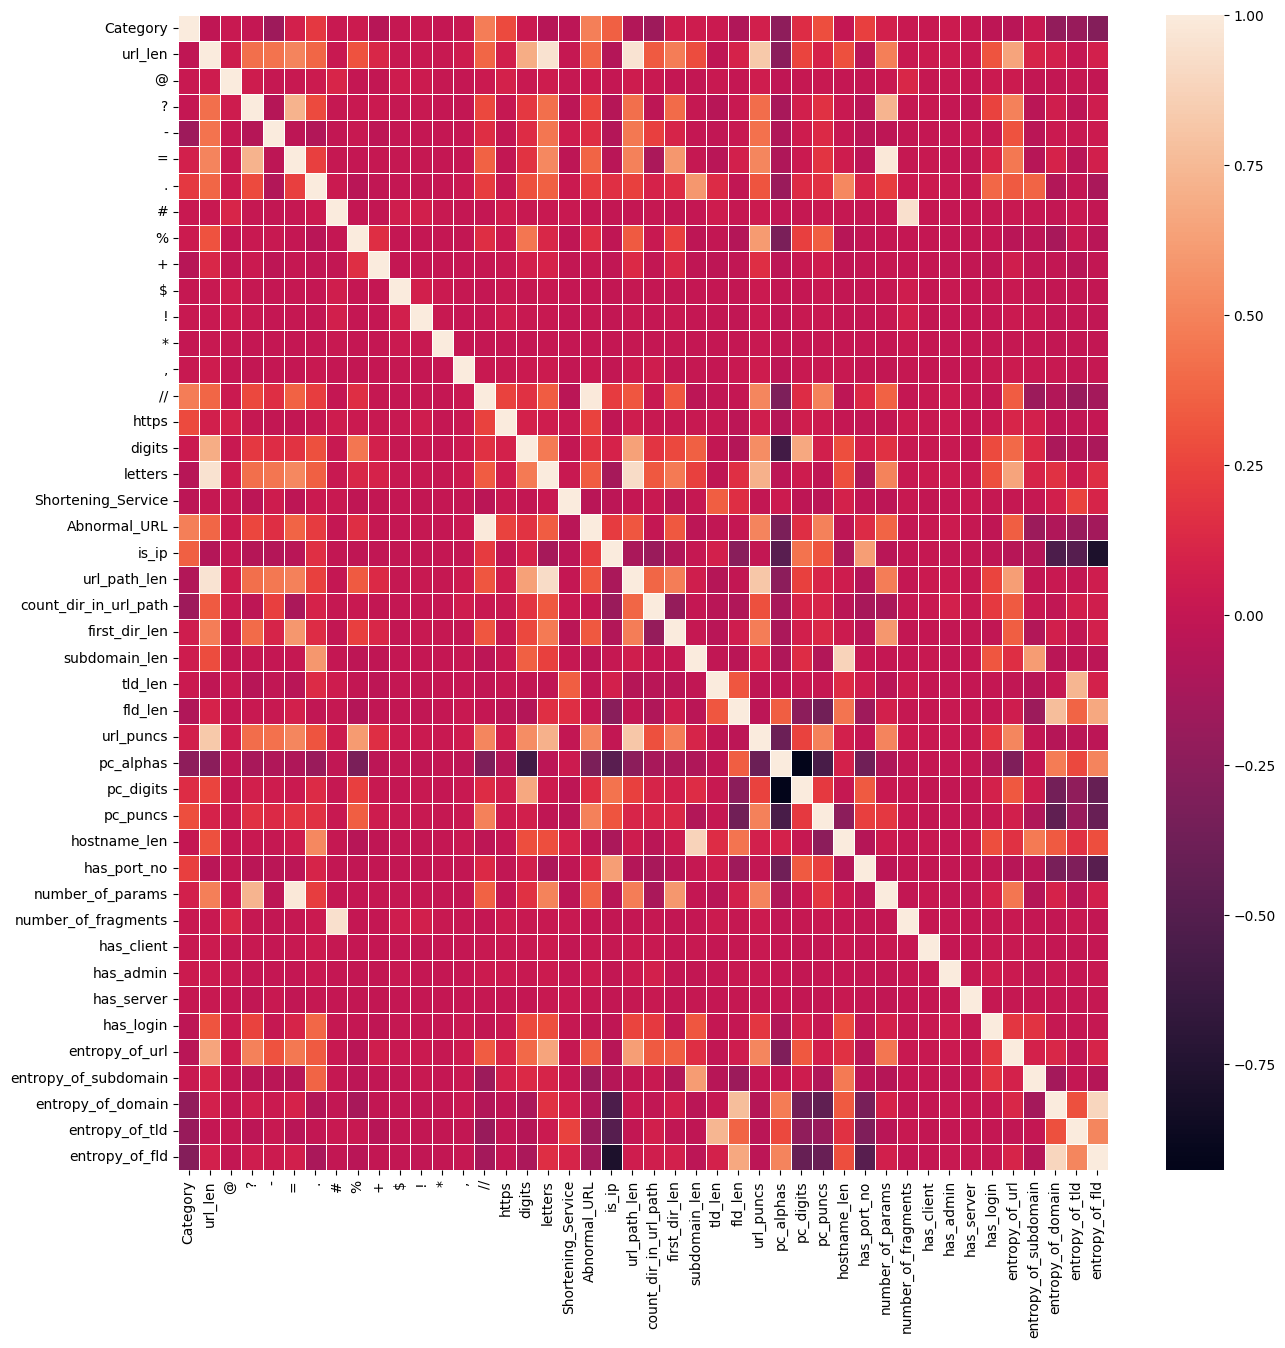

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_final.corr(), linewidths=.5)

In [ ]:
df_final.to_csv('feature_extracted_df_final.csv')

#Feature Transformation

In [ ]:
enc = OrdinalEncoder()
df_final[["url_len_q","fld_len_q"]] = enc.fit_transform(df_final[["url_len_q","fld_len_q"]])

In [ ]:
map={False: 0, True:1 }

In [ ]:
df_final['has_client']=df_final['has_client'].replace(map)

In [ ]:
df_final['has_server']=df_final['has_server'].replace(map)

In [ ]:
df_final['has_login']=df_final['has_login'].replace(map)

In [ ]:
df_final['has_admin']=df_final['has_admin'].replace(map)

In [ ]:
df_final['has_port_no']=df_final['has_port_no'].replace(map)

In [ ]:
df_final.head()

type  Category  url_len  @  ?  -  =  .  #  %  ...  \
0    phishing         2       16  0  0  1  0  2  0  0  ...   
1      benign         0       35  0  0  0  0  2  0  0  ...   
2      benign         0       31  0  0  0  0  2  0  0  ...   
3  defacement         1       88  0  1  1  4  3  0  0  ...   
4  defacement         1      235  0  1  1  3  2  0  0  ...   

   number_of_fragments  has_client  has_admin  has_server  has_login  \
0                    0           0          0           0          0   
1                    0           0          0           0          0   
2                    0           0          0           0          0   
3                    0           0          0           0          0   
4                    0           0          0           0          0   

   entropy_of_url  entropy_of_subdomain  entropy_of_domain  entropy_of_tld  \
0        3.375000                   0.0           3.169925        2.584963   
1        4.079143                   0.0           2.807355        1.584963   
2        3.708093                   0.0           2.921928        1.584963   
3        4.660343                  -0.0           2.896292        1.000000   
4        4.980518                   0.0           3.405822        1.584963   

   entropy_of_fld  
0        3.375000  
1        3.277613  
2        3.235926  
3        3.146286  
4        3.501398  

[5 rows x 47 columns]

In [ ]:
df_final.to_csv('encoded_data.csv')

#Feature Selection

####selecting all features

In [ ]:
X=df_final.drop(['Category','type'], axis=1)

In [ ]:
y=df_final[['Category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  96.07%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     85565
           1       0.98      0.98      0.98     19319
           2       0.87      0.87      0.87     18805
           3       0.94      0.95      0.94      6550

    accuracy                           0.96    130239
   macro avg       0.94      0.94      0.94    130239
weighted avg       0.96      0.96      0.96    130239

             Confusion_matrix 


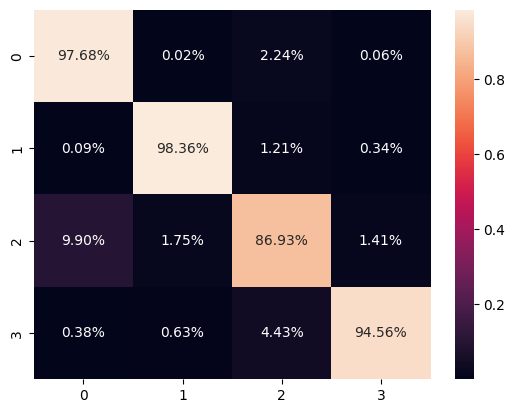

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 


<ipython-input-140-09dab4346e87>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_.fit(X_train, y_train)


Test Accuracy :  97.45%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85565
           1       0.98      1.00      0.99     19319
           2       0.93      0.90      0.91     18805
           3       0.99      0.94      0.96      6550

    accuracy                           0.97    130239
   macro avg       0.97      0.96      0.96    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


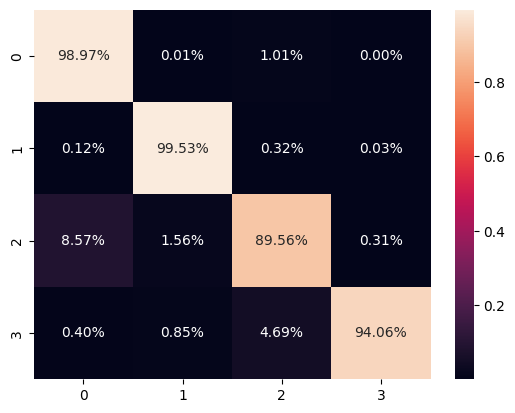

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy :  82.67%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85565
           1       0.90      0.93      0.92     19319
           2       0.42      0.16      0.23     18805
           3       0.55      0.26      0.35      6550

    accuracy                           0.83    130239
   macro avg       0.68      0.59      0.60    130239
weighted avg       0.78      0.83      0.79    130239

             Confusion_matrix 


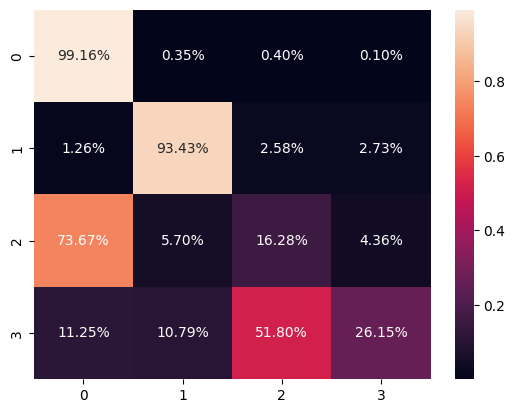

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy :  94.90%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85565
           1       0.93      0.98      0.95     19319
           2       0.88      0.80      0.84     18805
           3       0.96      0.91      0.93      6550

    accuracy                           0.95    130239
   macro avg       0.93      0.92      0.92    130239
weighted avg       0.95      0.95      0.95    130239

             Confusion_matrix 


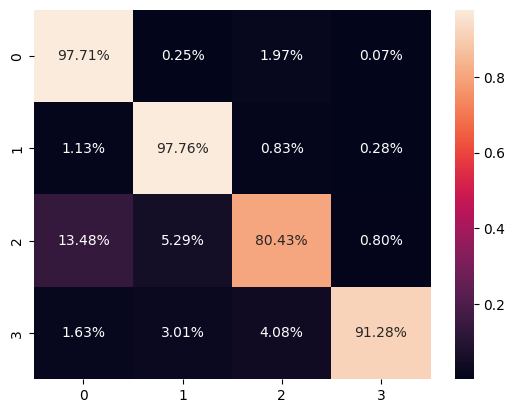

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy :  81.78%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     85565
           1       0.81      0.83      0.82     19319
           2       0.49      0.12      0.19     18805
           3       0.69      0.68      0.68      6550

    accuracy                           0.82    130239
   macro avg       0.71      0.65      0.65    130239
weighted avg       0.78      0.82      0.78    130239

             Confusion_matrix 


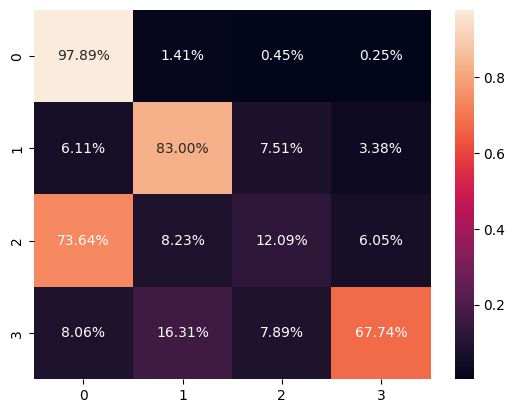

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 


<ipython-input-140-09dab4346e87>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_.fit(X_train, y_train)


Test Accuracy :  97.39%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     85565
           1       0.98      1.00      0.99     19319
           2       0.93      0.89      0.91     18805
           3       0.99      0.94      0.97      6550

    accuracy                           0.97    130239
   macro avg       0.97      0.96      0.96    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


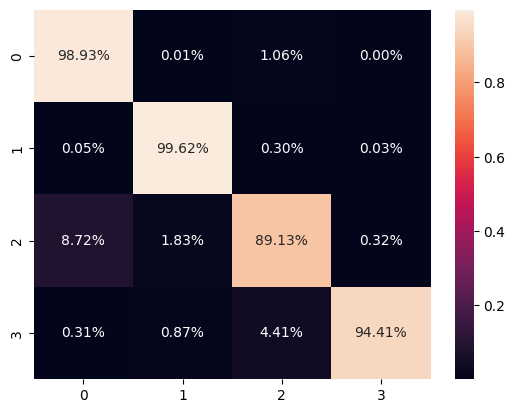

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy :  79.19%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88     85565
           1       0.69      0.98      0.81     19319
           2       0.54      0.07      0.12     18805
           3       0.62      0.74      0.68      6550

    accuracy                           0.79    130239
   macro avg       0.67      0.68      0.62    130239
weighted avg       0.76      0.79      0.75    130239

             Confusion_matrix 


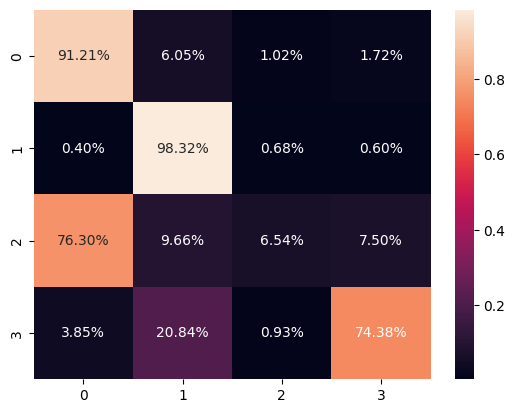

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
    plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  87.12%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     85565
           1       0.83      0.82      0.83     19319
           2       0.70      0.64      0.67     18805
           3       0.59      0.76      0.66      6550

    accuracy                           0.87    130239
   macro avg       0.77      0.79      0.78    130239
weighted avg       0.87      0.87      0.87    130239

             Confusion_matrix 


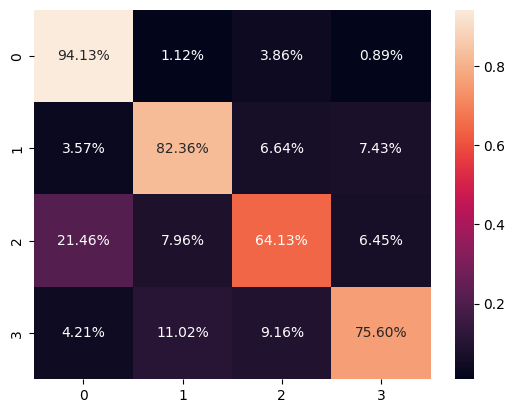

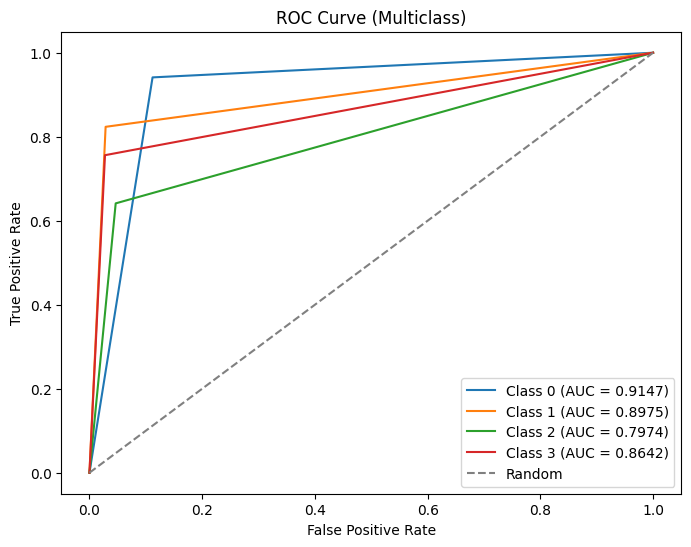

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 


<ipython-input-141-e55eb6f55512>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_.fit(X_train[:1000], y_train[:1000])


Test Accuracy :  89.80%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85565
           1       0.83      0.95      0.88     19319
           2       0.87      0.54      0.67     18805
           3       0.79      0.75      0.77      6550

    accuracy                           0.90    130239
   macro avg       0.85      0.80      0.82    130239
weighted avg       0.90      0.90      0.89    130239

             Confusion_matrix 


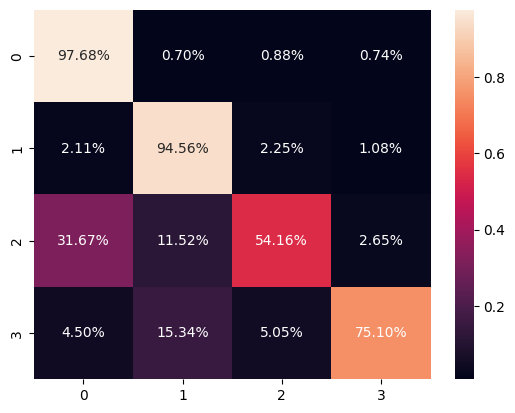

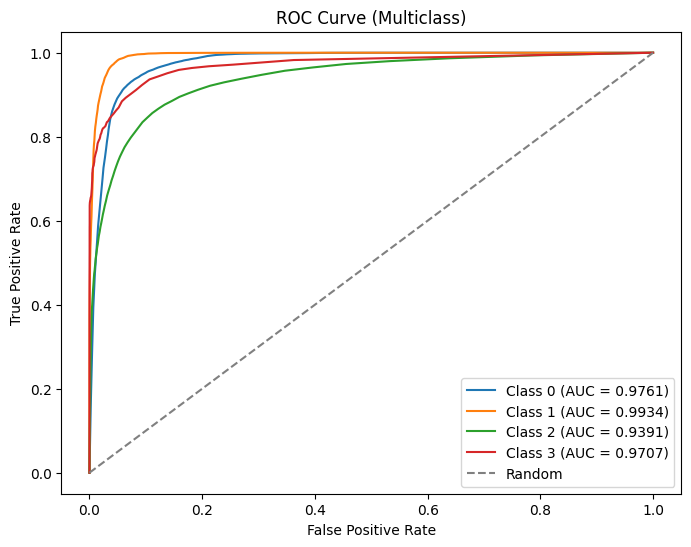

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy :  47.10%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.31      0.46     85565
           1       0.80      0.79      0.80     19319
           2       0.21      0.81      0.33     18805
           3       0.50      0.68      0.57      6550

    accuracy                           0.47    130239
   macro avg       0.60      0.65      0.54    130239
weighted avg       0.77      0.47      0.50    130239

             Confusion_matrix 


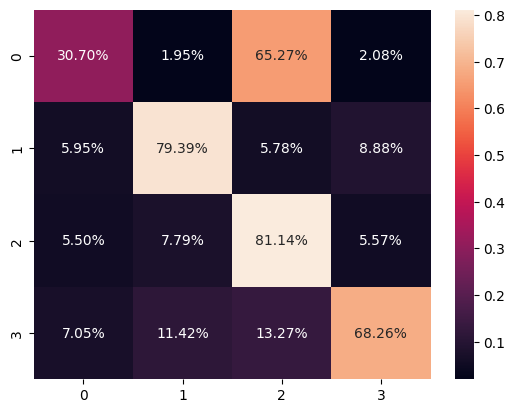

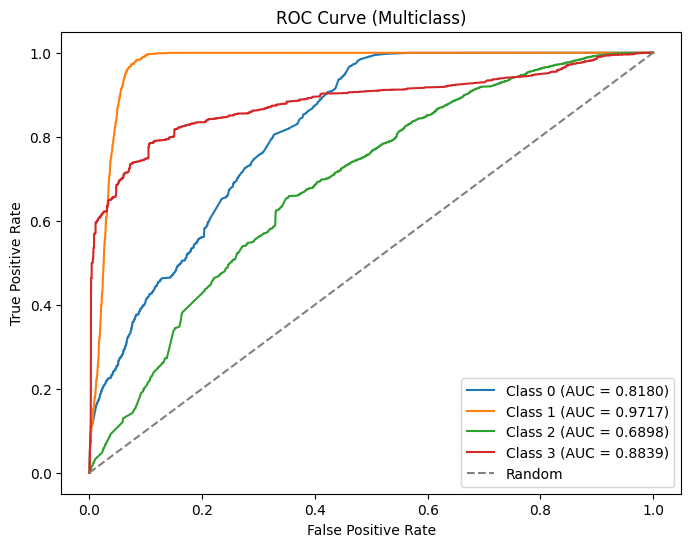

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy :  77.82%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     85565
           1       0.72      0.69      0.70     19319
           2       0.63      0.22      0.32     18805
           3       0.91      0.55      0.69      6550

    accuracy                           0.78    130239
   macro avg       0.76      0.60      0.64    130239
weighted avg       0.76      0.78      0.75    130239

             Confusion_matrix 


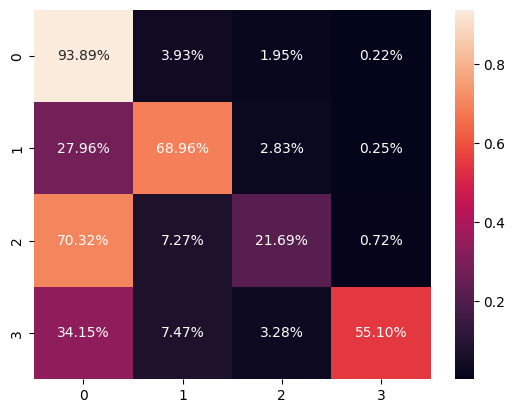

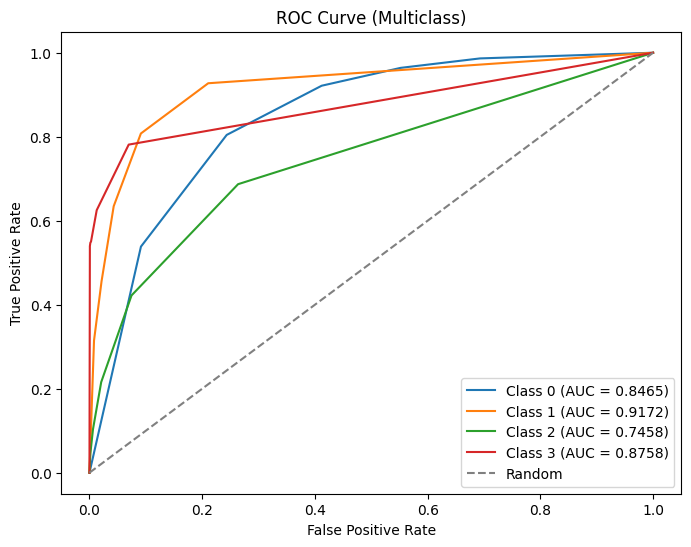

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 


<ipython-input-141-e55eb6f55512>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_.fit(X_train[:1000], y_train[:1000])


Test Accuracy :  89.51%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.83      0.96      0.89     19319
           2       0.89      0.50      0.64     18805
           3       0.80      0.76      0.78      6550

    accuracy                           0.90    130239
   macro avg       0.86      0.80      0.82    130239
weighted avg       0.90      0.90      0.89    130239

             Confusion_matrix 


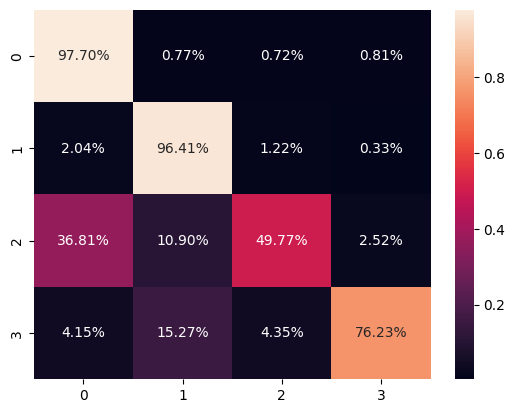

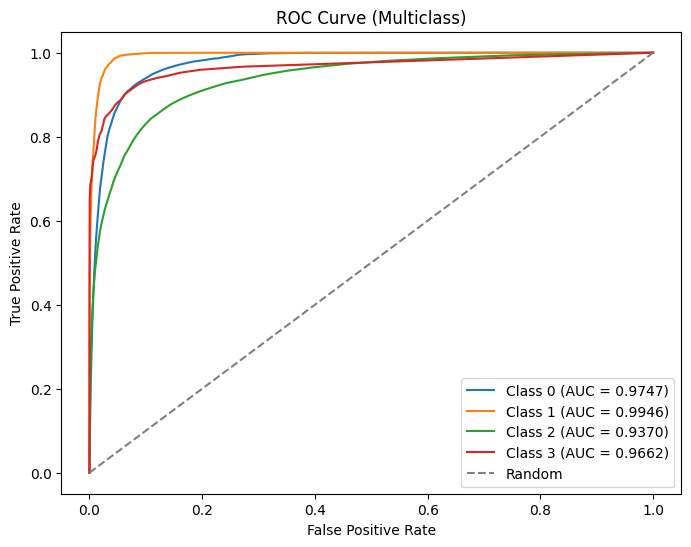

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  61.52%  
              Classification_report 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.50      0.66     85565
           1       0.70      0.97      0.82     19319
           2       0.28      0.78      0.41     18805
           3       0.69      0.58      0.63      6550

    accuracy                           0.62    130239
   macro avg       0.66      0.71      0.63    130239
weighted avg       0.81      0.62      0.64    130239

             Confusion_matrix 


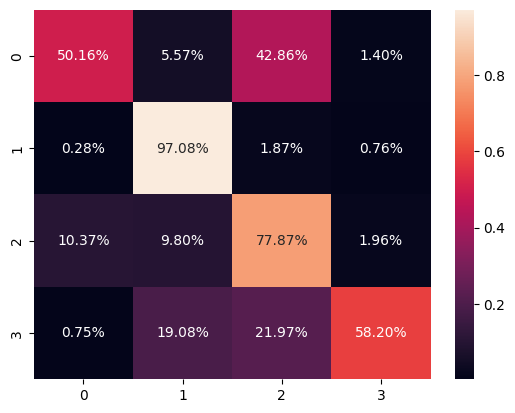

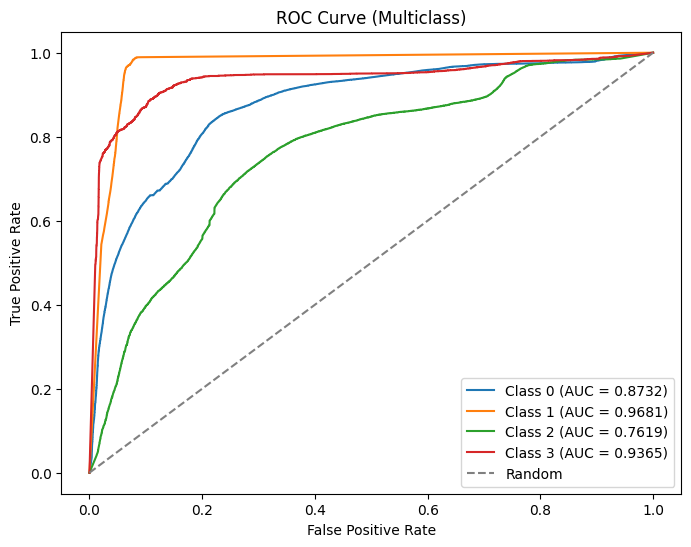

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_= m()
    model_.fit(X_train[:1000], y_train[:1000])
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
    plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
    plt.savefig('S-CF'+str(m)+'.jpg', dpi=300)
    plt.show()

    # ROC Curve and AUC for each class
    num_classes=4
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_proba=model_.predict_proba(X_test)
    y_true_one_hot = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curve for each class
    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

    plt.title('ROC Curve (Multiclass)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.savefig('S-ROC'+str(m)+'.jpg', dpi=300)
    plt.show()
    print('\033[31m###################- End -###################\033[0m')



#############################################
SVC


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy :  72.84%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     85565
           1       0.80      0.40      0.53     19319
           2       0.80      0.01      0.01     18805
           3       0.96      0.47      0.63      6550

    accuracy                           0.73    130239
   macro avg       0.82      0.47      0.50    130239
weighted avg       0.75      0.73      0.66    130239

             Confusion_matrix 


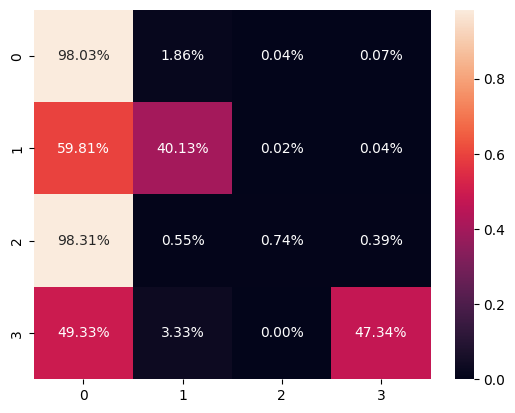

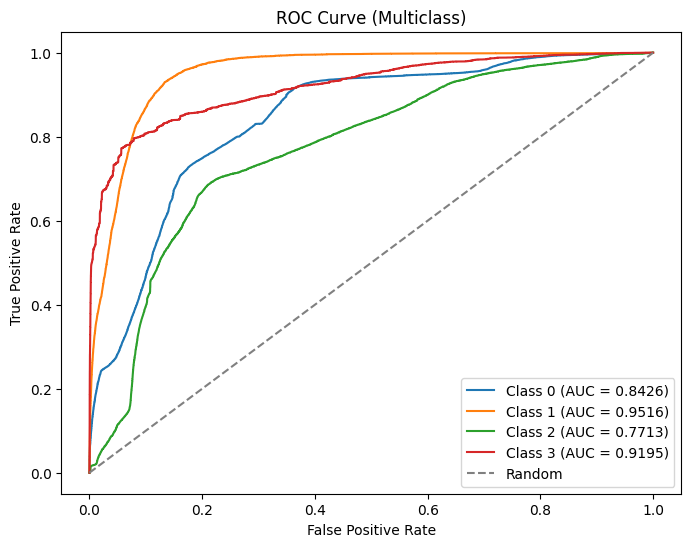

###################- End -###################


In [ ]:
print('#############################################')
print('SVC')
model_= SVC(probability=True)
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, pred))
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
plt.savefig('S-CF-SVC.jpg', dpi=300)
plt.show()

# ROC Curve and AUC for each class
num_classes=4
fpr = dict()
tpr = dict()
roc_auc = dict()
y_proba=model_.predict_proba(X_test)
y_true_one_hot = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

for i in range(num_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
     plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('S-ROC-SVC.jpg', dpi=300)
plt.show()
print('\033[31m###################- End -###################\033[0m')



#############################################
SGD
Test Accuracy :  77.29%  
              Classification_report 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.81      0.95      0.88     85565
           1       0.91      0.57      0.70     19319
           2       0.36      0.23      0.28     18805
           3       0.69      0.54      0.61      6550

    accuracy                           0.77    130239
   macro avg       0.69      0.58      0.62    130239
weighted avg       0.75      0.77      0.75    130239

             Confusion_matrix 


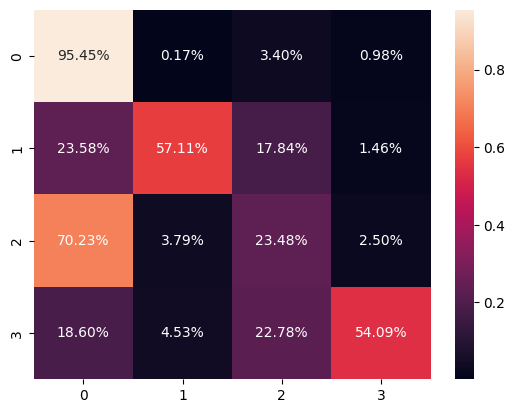

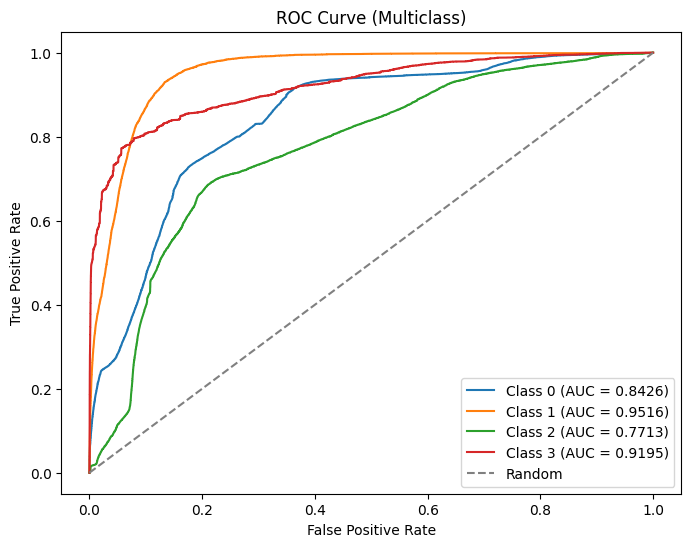

###################- End -###################


In [ ]:
print('#############################################')
print('SGD')
model_ = SGDClassifier(loss='log')
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, pred))
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
plt.savefig('S-CF-SGD.jpg', dpi=300)
plt.show()

# ROC Curve and AUC for each class
num_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Remove NaN values from y_true_one_hot and y_proba
valid_indices = ~np.isnan(y_true_one_hot).any(axis=1) & ~np.isnan(y_proba).any(axis=1)
y_true_one_hot = y_true_one_hot[valid_indices]
y_proba = y_proba[valid_indices]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('S-ROC-SGD.jpg', dpi=300)
plt.show()
print('\033[31m###################- End -###################\033[0m')


###selecting features by correlation

In [ ]:
correlation_matrix=df_final.corr()['Category']

<ipython-input-146-8562d60230df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df_final.corr()['Category']


In [ ]:
threshold = 0.1  # Adjust this threshold to your preference

selected_features = correlation_matrix[abs(correlation_matrix) >= threshold].index.tolist()

In [ ]:
selected_features

['Category',
 '-',
 '.',
 '//',
 'https',
 'Abnormal_URL',
 'is_ip',
 'count_dir_in_url_path',
 'pc_alphas',
 'pc_digits',
 'pc_puncs',
 'has_port_no',
 'entropy_of_domain',
 'entropy_of_tld',
 'entropy_of_fld']

In [ ]:
df_high_corr= df_final[selected_features]

In [ ]:
df_high_corr.head()

Category  -  .  //  https  Abnormal_URL  is_ip  count_dir_in_url_path  \
0         2  1  2   0      0             0      0                      0   
1         0  0  2   0      0             0      0                      2   
2         0  0  2   0      0             0      0                      3   
3         1  1  3   1      0             1      0                      1   
4         1  1  2   1      0             1      0                      1   

   pc_alphas  pc_digits  pc_puncs  has_port_no  entropy_of_domain  \
0   0.812500   0.000000  0.187500            0           3.169925   
1   0.828571   0.028571  0.142857            0           2.807355   
2   0.806452   0.032258  0.161290            0           2.921928   
3   0.715909   0.079545  0.204545            0           2.896292   
4   0.846809   0.093617  0.059574            0           3.405822   

   entropy_of_tld  entropy_of_fld  
0        2.584963        3.375000  
1        1.584963        3.277613  
2        1.584963        3.235926  
3        1.000000        3.146286  
4        1.584963        3.501398

In [ ]:
X=df_high_corr.drop(['Category'], axis=1)

In [ ]:
y=df_high_corr[['Category']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  82.71%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     85565
           1       0.86      0.83      0.84     19319
           2       0.53      0.48      0.50     18805
           3       0.62      0.75      0.68      6550

    accuracy                           0.83    130239
   macro avg       0.73      0.74      0.73    130239
weighted avg       0.82      0.83      0.83    130239

             Confusion_matrix 


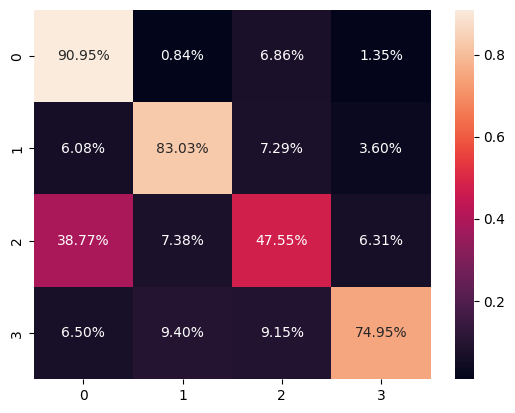

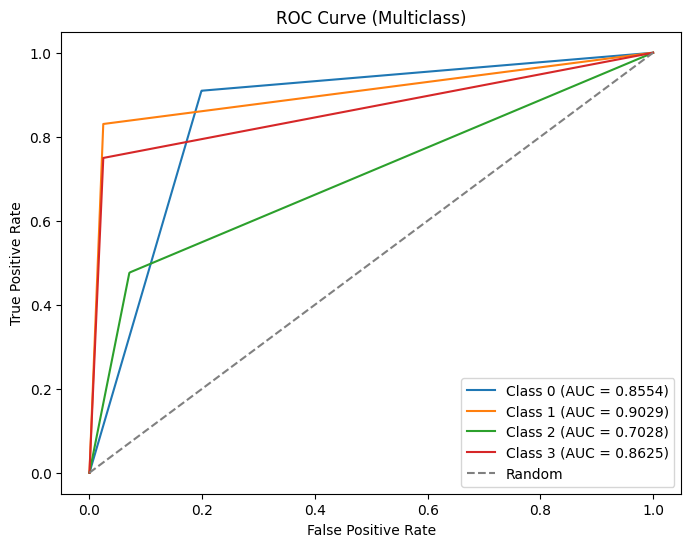

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 


<ipython-input-154-93ae31a61580>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_.fit(X_train[:1000], y_train[:1000])


Test Accuracy :  86.81%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85565
           1       0.81      0.94      0.87     19319
           2       0.88      0.36      0.51     18805
           3       0.72      0.74      0.73      6550

    accuracy                           0.87    130239
   macro avg       0.82      0.75      0.76    130239
weighted avg       0.87      0.87      0.85    130239

             Confusion_matrix 


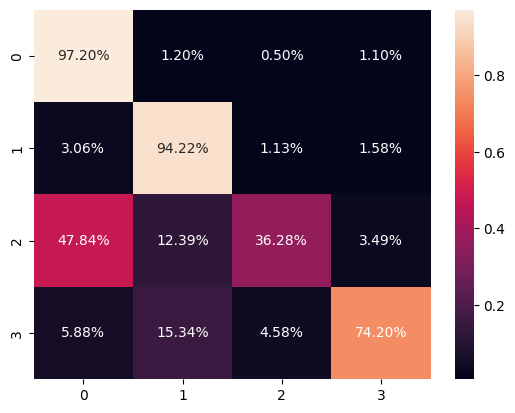

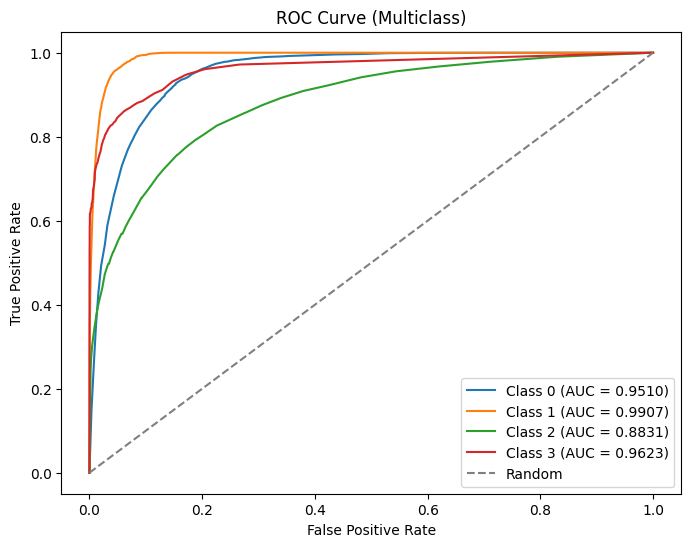

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy :  64.90%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.86      0.65      0.74     85565
           1       0.78      0.87      0.82     19319
           2       0.22      0.43      0.29     18805
           3       0.57      0.64      0.60      6550

    accuracy                           0.65    130239
   macro avg       0.61      0.65      0.61    130239
weighted avg       0.74      0.65      0.68    130239

             Confusion_matrix 


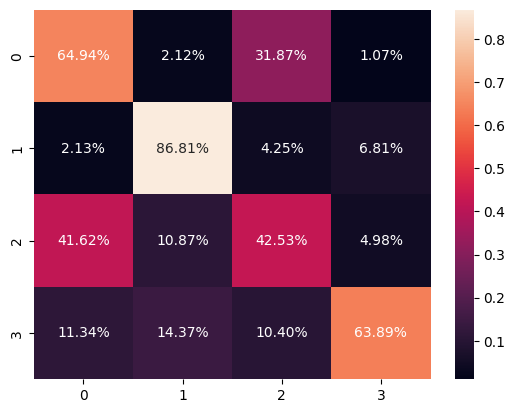

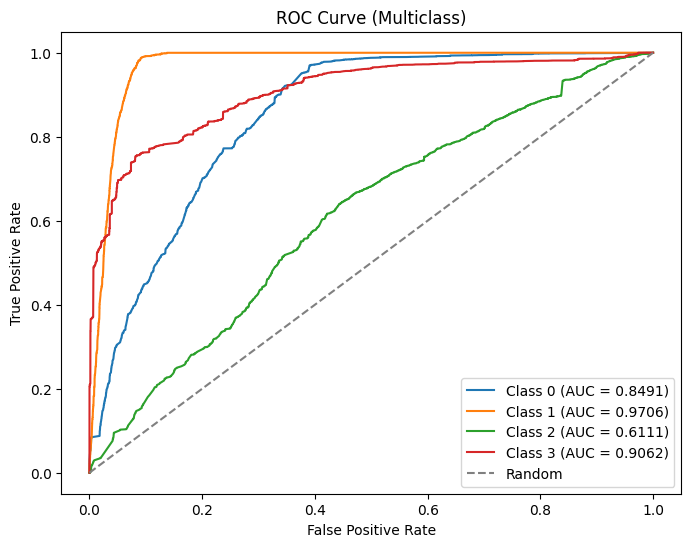

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test Accuracy :  84.09%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     85565
           1       0.80      0.88      0.84     19319
           2       0.68      0.30      0.42     18805
           3       0.81      0.68      0.74      6550

    accuracy                           0.84    130239
   macro avg       0.79      0.71      0.73    130239
weighted avg       0.83      0.84      0.82    130239

             Confusion_matrix 


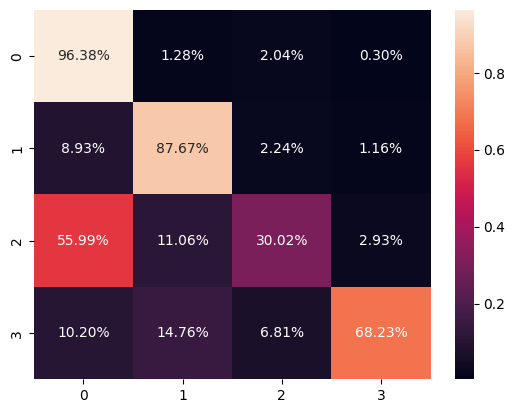

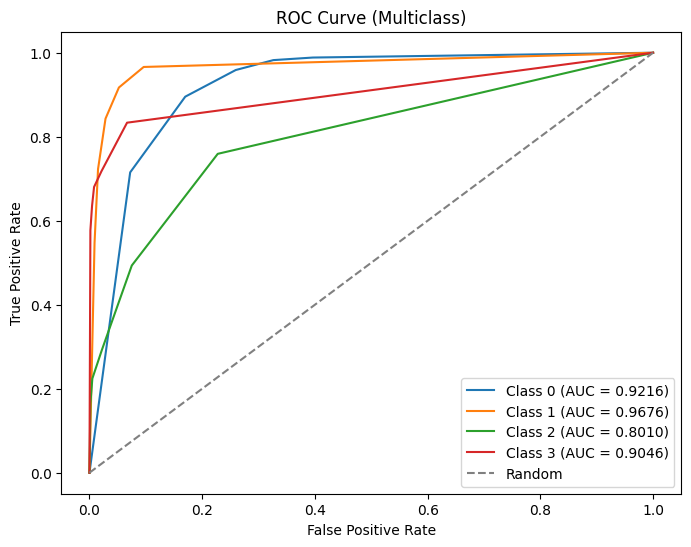

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 


<ipython-input-154-93ae31a61580>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_.fit(X_train[:1000], y_train[:1000])


Test Accuracy :  86.68%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     85565
           1       0.81      0.95      0.87     19319
           2       0.85      0.36      0.50     18805
           3       0.74      0.74      0.74      6550

    accuracy                           0.87    130239
   macro avg       0.82      0.76      0.76    130239
weighted avg       0.87      0.87      0.85    130239

             Confusion_matrix 


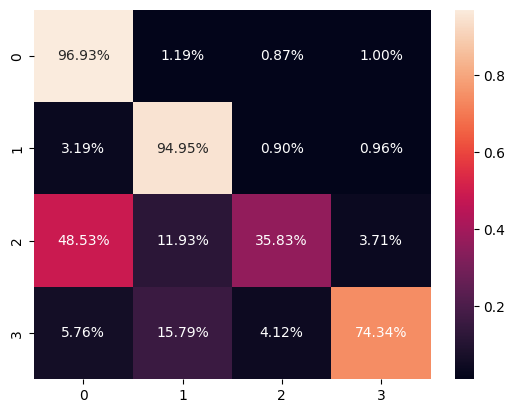

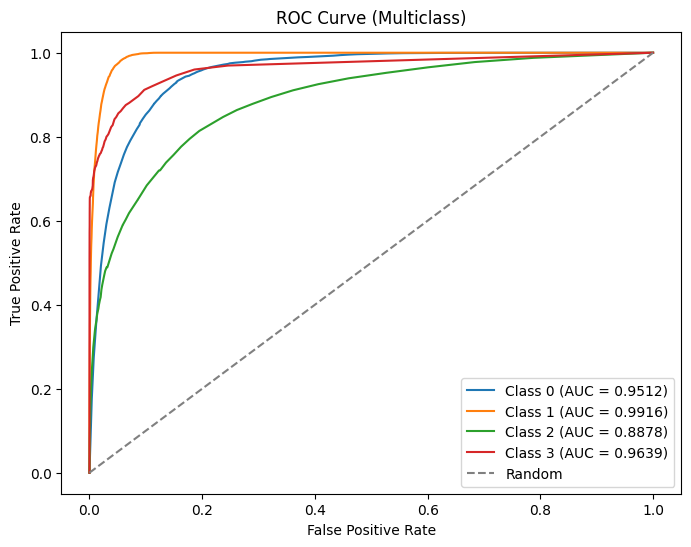

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  77.79%  
              Classification_report 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.90      0.87     85565
           1       0.65      1.00      0.78     19319
           2       0.32      0.10      0.16     18805
           3       0.88      0.49      0.63      6550

    accuracy                           0.78    130239
   macro avg       0.68      0.62      0.61    130239
weighted avg       0.74      0.78      0.74    130239

             Confusion_matrix 


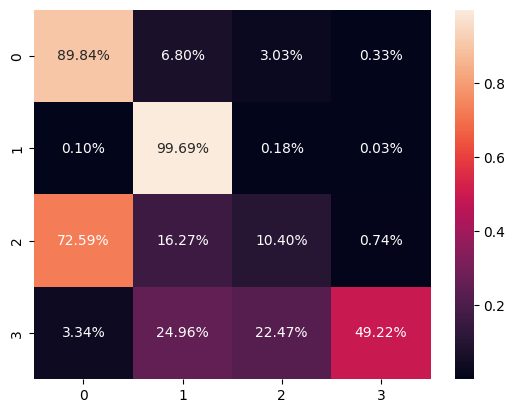

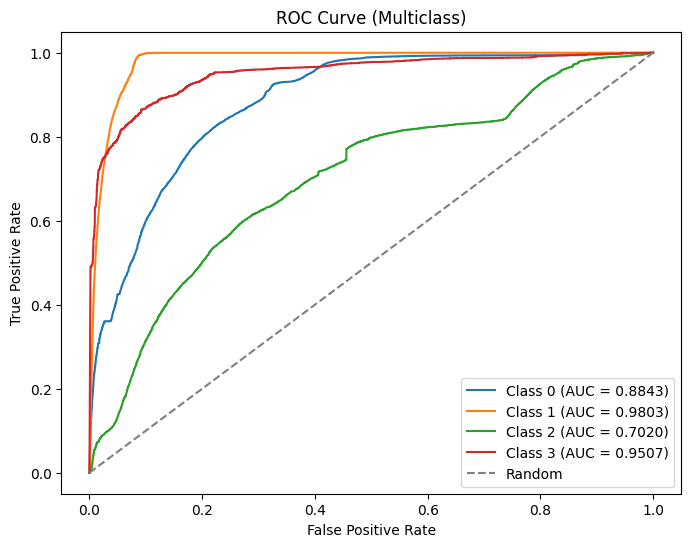

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_= m()
    model_.fit(X_train[:1000], y_train[:1000])
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
    plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
    plt.savefig('C-CF'+str(m)+'.jpg', dpi=300)
    plt.show()

    # ROC Curve and AUC for each class
    num_classes=4
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_proba=model_.predict_proba(X_test)
    y_true_one_hot = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curve for each class
    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

    plt.title('ROC Curve (Multiclass)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.savefig('C-ROC'+str(m)+'.jpg', dpi=300)
    plt.show()
    print('\033[31m###################- End -###################\033[0m')



#############################################
SVC


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy :  81.72%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     85565
           1       0.74      0.94      0.83     19319
           2       0.60      0.02      0.04     18805
           3       0.82      0.68      0.75      6550

    accuracy                           0.82    130239
   macro avg       0.75      0.66      0.63    130239
weighted avg       0.79      0.82      0.76    130239

             Confusion_matrix 


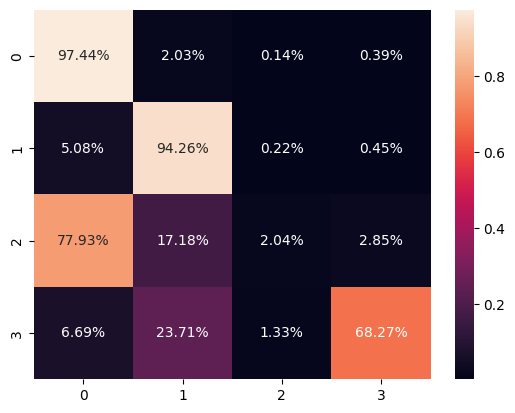

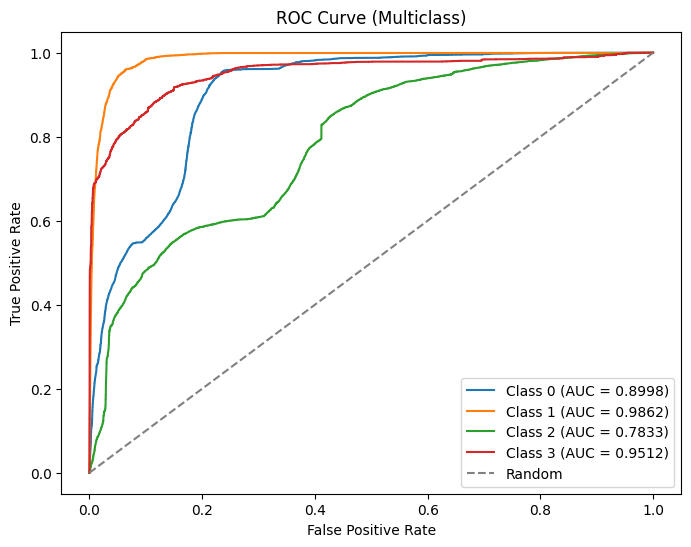

###################- End -###################


In [ ]:
print('#############################################')
print('SVC')
model_= SVC(probability=True)
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, pred))
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
plt.savefig('C-CF-SVC.jpg', dpi=300)
plt.show()

# ROC Curve and AUC for each class
num_classes=4
fpr = dict()
tpr = dict()
roc_auc = dict()
y_proba=model_.predict_proba(X_test)
y_true_one_hot = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

for i in range(num_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
     plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('C-ROC-SVC.jpg', dpi=300)
plt.show()
print('\033[31m###################- End -###################\033[0m')



#############################################
SGD
Test Accuracy :  79.41%  
              Classification_report 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.92      0.88     85565
           1       0.75      0.93      0.83     19319
           2       0.35      0.17      0.23     18805
           3       0.77      0.55      0.64      6550

    accuracy                           0.79    130239
   macro avg       0.68      0.64      0.65    130239
weighted avg       0.76      0.79      0.77    130239

             Confusion_matrix 


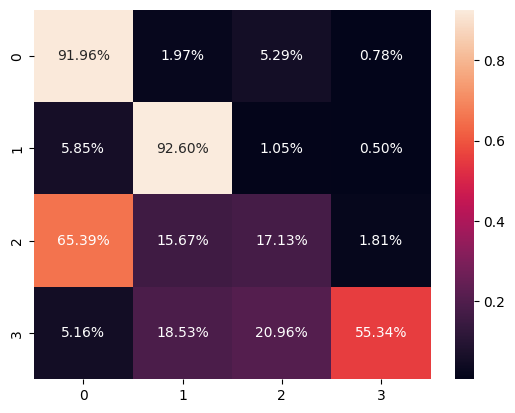

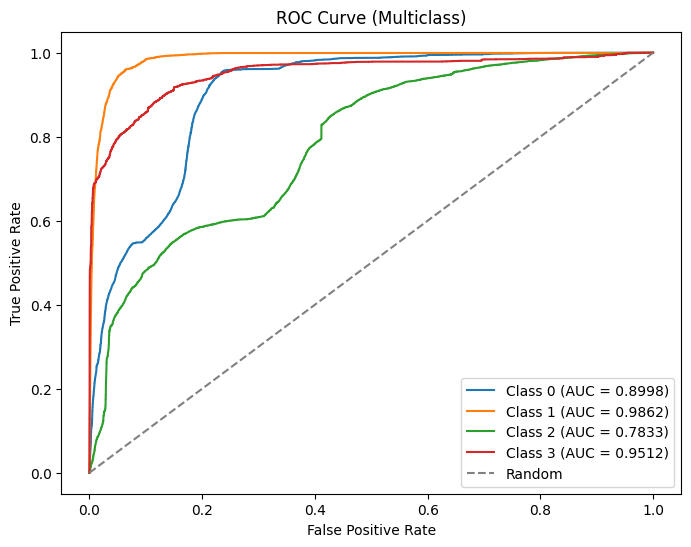

###################- End -###################


In [ ]:
print('#############################################')
print('SGD')
model_ = SGDClassifier(loss='log')
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, pred))
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
plt.savefig('C-CF-SGD.jpg', dpi=300)
plt.show()

# ROC Curve and AUC for each class
num_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Remove NaN values from y_true_one_hot and y_proba
valid_indices = ~np.isnan(y_true_one_hot).any(axis=1) & ~np.isnan(y_proba).any(axis=1)
y_true_one_hot = y_true_one_hot[valid_indices]
y_proba = y_proba[valid_indices]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('C-ROC-SGD.jpg', dpi=300)
plt.show()
print('\033[31m###################- End -###################\033[0m')



###Random Forest feature Importances

In [ ]:
X=df_final.drop(['Category','type'], axis=1)
y = df_final['Category']


rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

Feature_importances = rf.feature_importances_
features = X.columns
sorted_indices = np.argsort(Feature_importances)




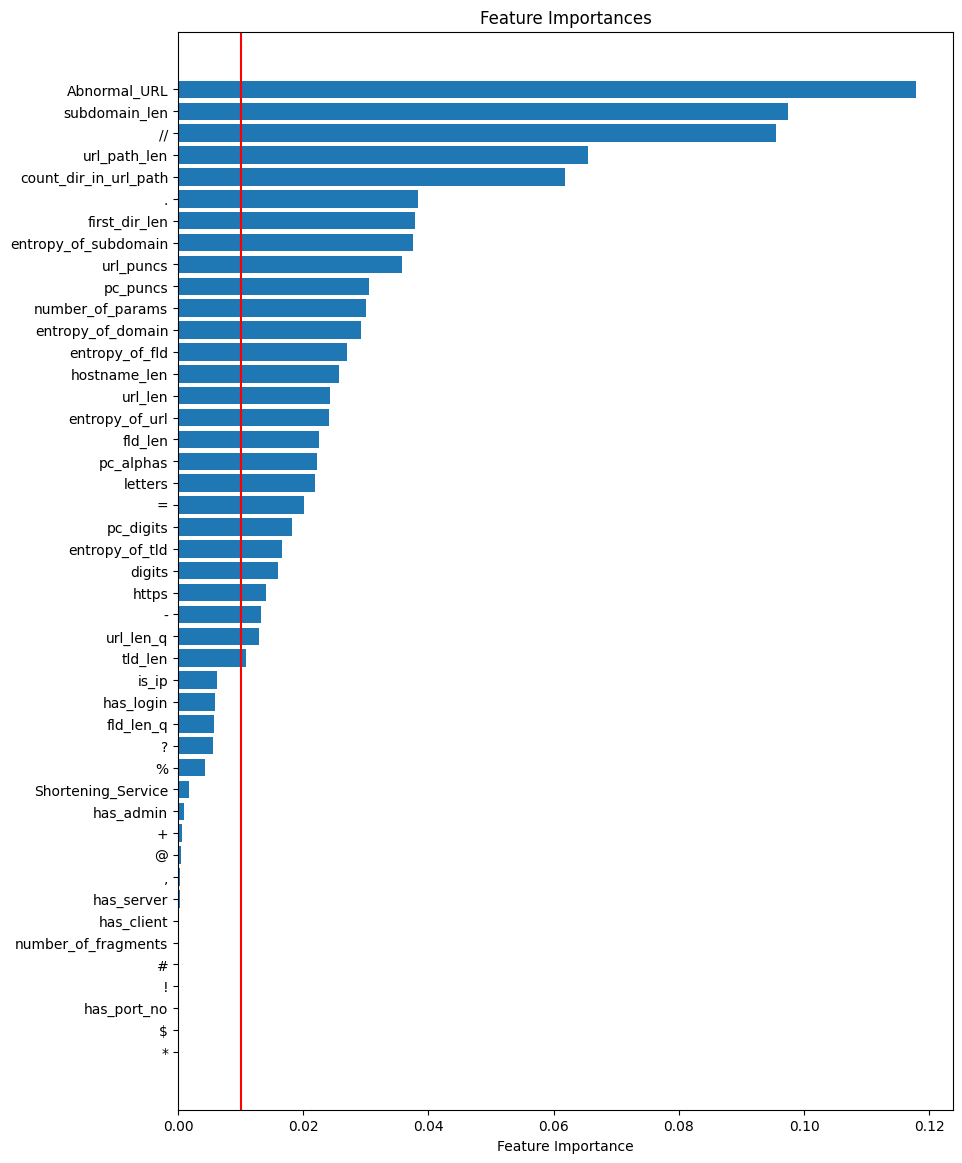

Eliminated Features:
['@', '?', '#', '%', '+', '$', '!', '*', ',', 'Shortening_Service', 'is_ip', 'fld_len_q', 'has_port_no', 'number_of_fragments', 'has_client', 'has_admin', 'has_server', 'has_login']

Final Selected Features:
['url_len', '-', '=', '.', '//', 'https', 'digits', 'letters', 'Abnormal_URL', 'url_path_len', 'count_dir_in_url_path', 'first_dir_len', 'subdomain_len', 'tld_len', 'fld_len', 'url_puncs', 'url_len_q', 'pc_alphas', 'pc_digits', 'pc_puncs', 'hostname_len', 'number_of_params', 'entropy_of_url', 'entropy_of_subdomain', 'entropy_of_domain', 'entropy_of_tld', 'entropy_of_fld']


In [ ]:
threshold = 0.01
plt.figure(figsize=(10, 14))

plt.barh(range(X.shape[1]), Feature_importances[sorted_indices], align='center')
plt.axvline(x=threshold, color='r', linestyle='-')
plt.yticks(range(X.shape[1]), [features[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.savefig('Feature_importances.jpg',dpi=300)
plt.show()



selected_features_rf=[]
eliminated_features_rf=[]

for feature, importance in zip(features,Feature_importances):
    if importance>threshold:
        selected_features_rf.append(feature)
    else:
        eliminated_features_rf.append(feature)

print("Eliminated Features:")
print(eliminated_features_rf)
print("\nFinal Selected Features:")
print(selected_features_rf)


In [ ]:
X=X[selected_features_rf]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  96.00%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     85565
           1       0.98      0.98      0.98     19319
           2       0.87      0.87      0.87     18805
           3       0.94      0.94      0.94      6550

    accuracy                           0.96    130239
   macro avg       0.94      0.94      0.94    130239
weighted avg       0.96      0.96      0.96    130239

             Confusion_matrix 


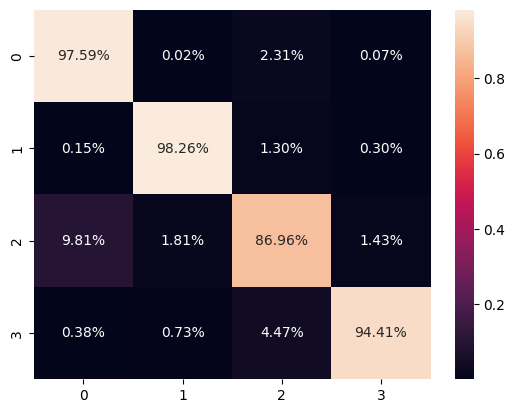

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  97.43%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85565
           1       0.98      1.00      0.99     19319
           2       0.93      0.89      0.91     18805
           3       0.99      0.94      0.96      6550

    accuracy                           0.97    130239
   macro avg       0.97      0.96      0.96    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


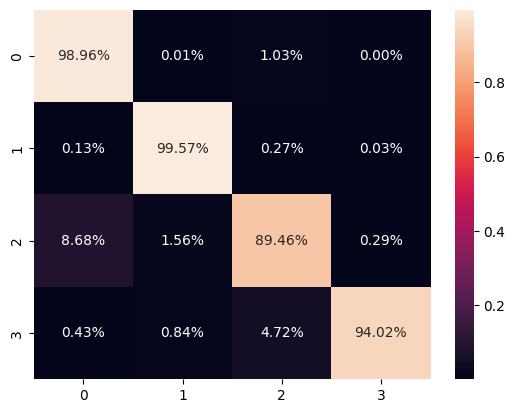

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  75.25%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     85565
           1       0.91      0.93      0.92     19319
           2       0.35      0.72      0.47     18805
           3       0.71      0.52      0.60      6550

    accuracy                           0.75    130239
   macro avg       0.73      0.73      0.70    130239
weighted avg       0.84      0.75      0.78    130239

             Confusion_matrix 


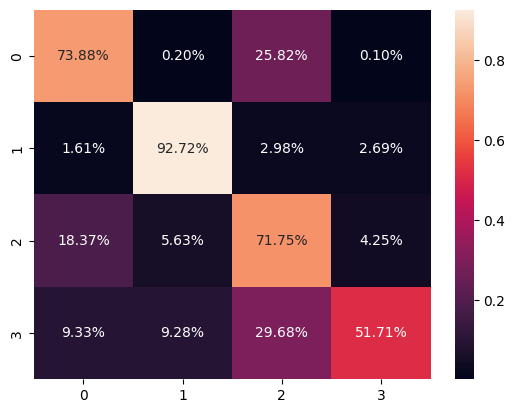

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  94.87%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85565
           1       0.93      0.98      0.95     19319
           2       0.88      0.80      0.84     18805
           3       0.96      0.91      0.93      6550

    accuracy                           0.95    130239
   macro avg       0.93      0.92      0.92    130239
weighted avg       0.95      0.95      0.95    130239

             Confusion_matrix 


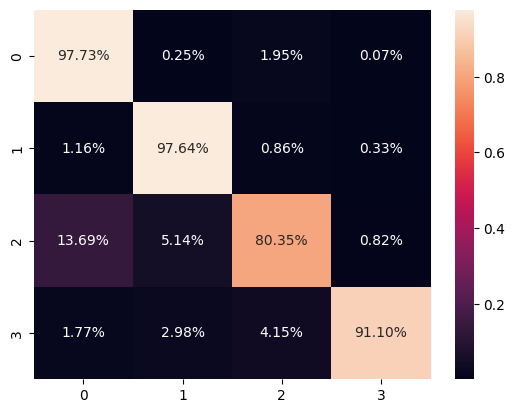

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  81.47%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     85565
           1       0.78      0.85      0.82     19319
           2       0.42      0.16      0.23     18805
           3       0.83      0.57      0.67      6550

    accuracy                           0.81    130239
   macro avg       0.72      0.64      0.66    130239
weighted avg       0.78      0.81      0.78    130239

             Confusion_matrix 


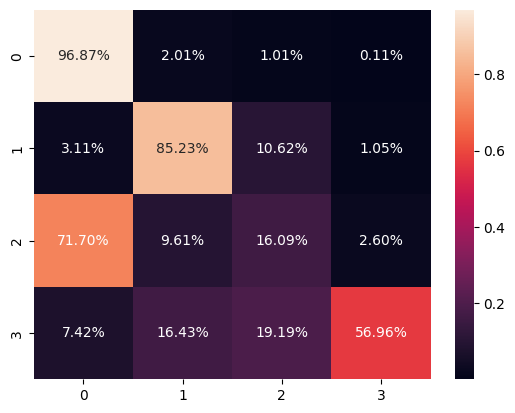

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  97.26%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     85565
           1       0.98      1.00      0.99     19319
           2       0.93      0.89      0.91     18805
           3       0.99      0.94      0.96      6550

    accuracy                           0.97    130239
   macro avg       0.97      0.95      0.96    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


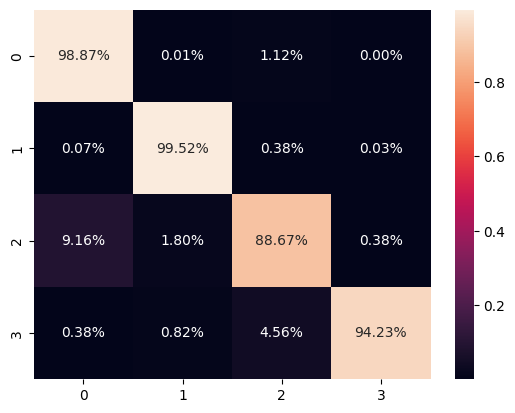

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  78.60%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     85565
           1       0.68      0.99      0.80     19319
           2       0.47      0.36      0.41     18805
           3       0.69      0.71      0.70      6550

    accuracy                           0.79    130239
   macro avg       0.68      0.73      0.69    130239
weighted avg       0.79      0.79      0.78    130239

             Confusion_matrix 


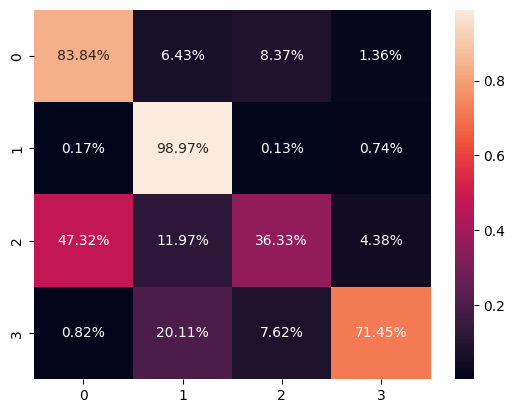

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
    plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  87.21%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     85565
           1       0.83      0.81      0.82     19319
           2       0.70      0.65      0.68     18805
           3       0.59      0.76      0.66      6550

    accuracy                           0.87    130239
   macro avg       0.77      0.79      0.78    130239
weighted avg       0.87      0.87      0.87    130239

             Confusion_matrix 


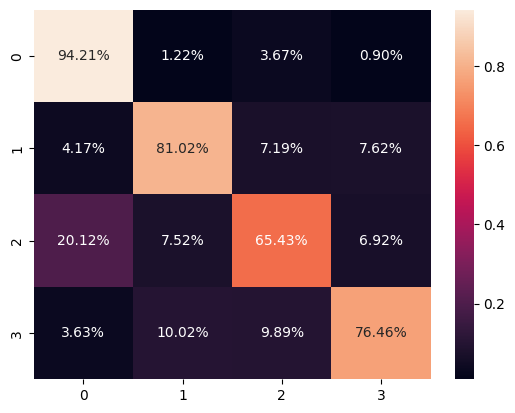

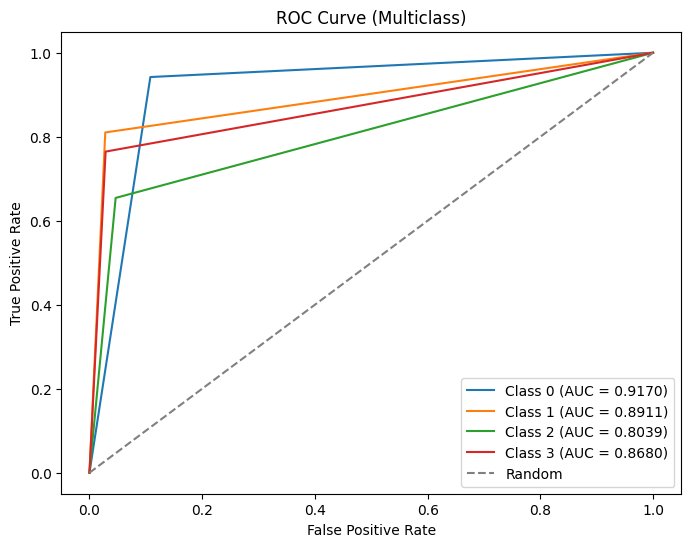

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  89.88%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     85565
           1       0.83      0.94      0.89     19319
           2       0.85      0.57      0.68     18805
           3       0.78      0.76      0.77      6550

    accuracy                           0.90    130239
   macro avg       0.85      0.81      0.82    130239
weighted avg       0.90      0.90      0.89    130239

             Confusion_matrix 


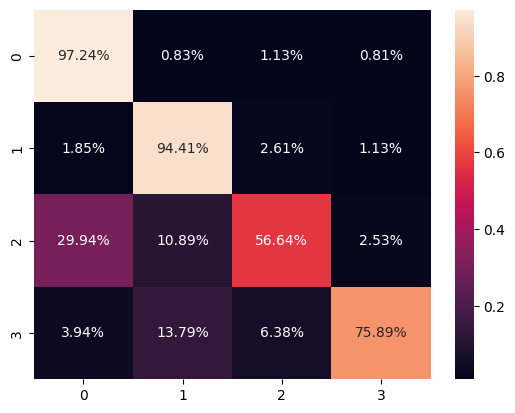

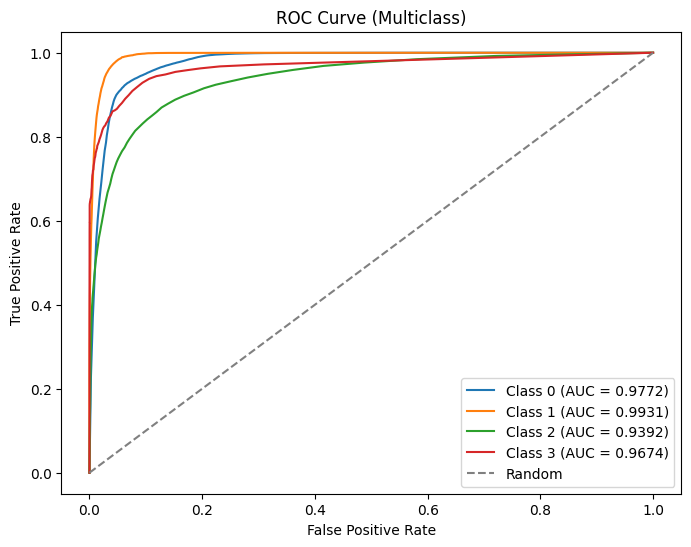

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  47.10%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.31      0.46     85565
           1       0.80      0.79      0.80     19319
           2       0.21      0.81      0.33     18805
           3       0.50      0.68      0.57      6550

    accuracy                           0.47    130239
   macro avg       0.60      0.65      0.54    130239
weighted avg       0.77      0.47      0.50    130239

             Confusion_matrix 


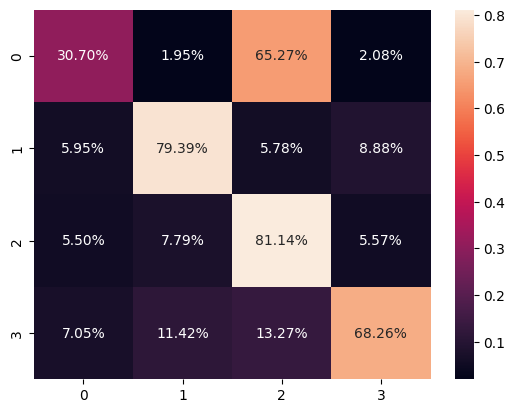

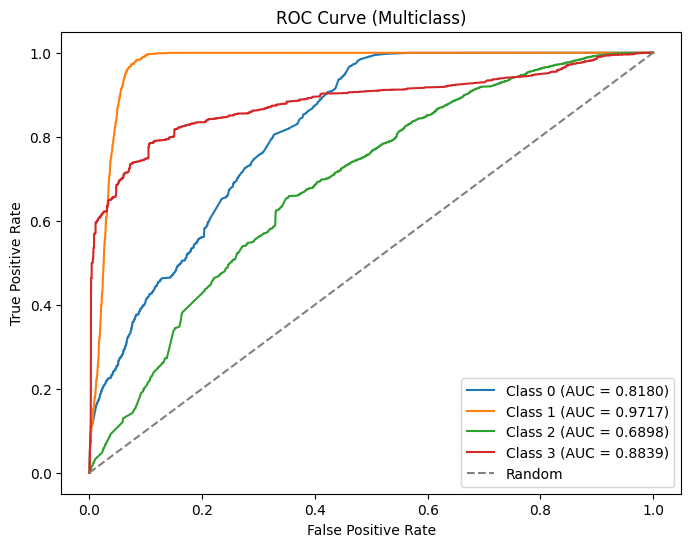

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  77.96%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     85565
           1       0.72      0.69      0.70     19319
           2       0.64      0.23      0.33     18805
           3       0.90      0.55      0.68      6550

    accuracy                           0.78    130239
   macro avg       0.76      0.60      0.65    130239
weighted avg       0.77      0.78      0.75    130239

             Confusion_matrix 


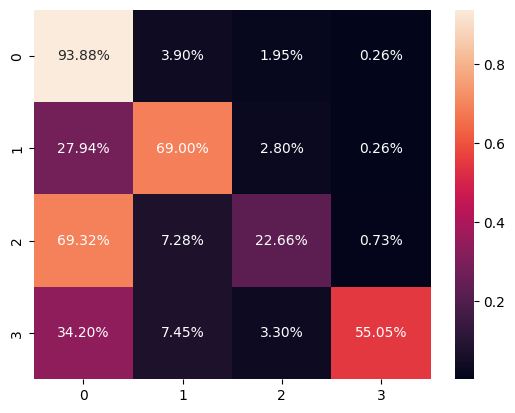

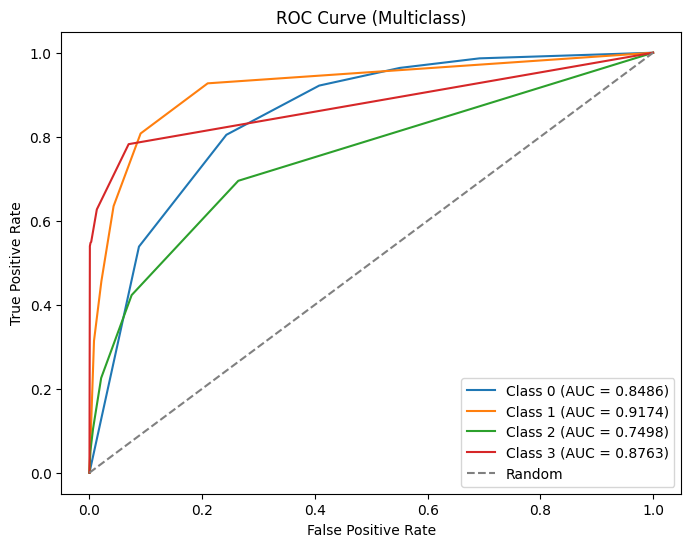

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  89.82%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.84      0.96      0.90     19319
           2       0.87      0.52      0.65     18805
           3       0.79      0.77      0.78      6550

    accuracy                           0.90    130239
   macro avg       0.86      0.81      0.82    130239
weighted avg       0.90      0.90      0.89    130239

             Confusion_matrix 


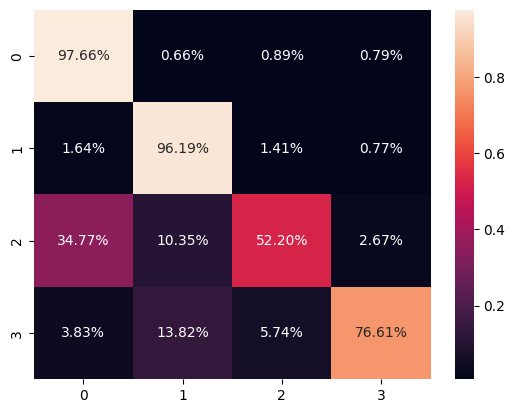

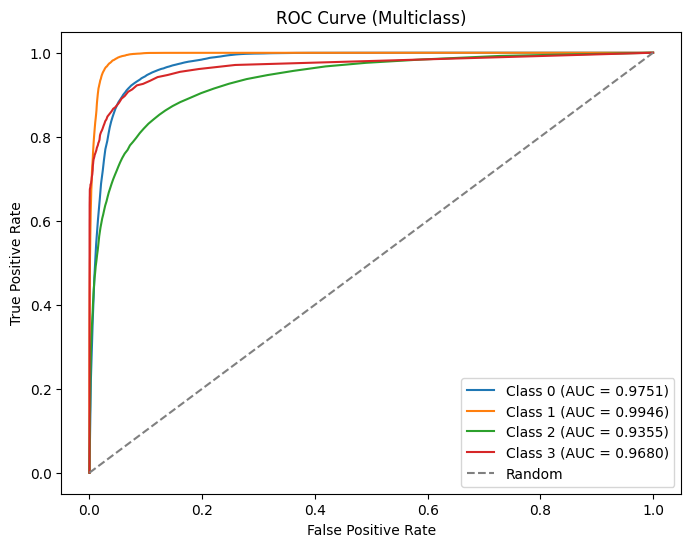

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  78.26%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     85565
           1       0.68      0.99      0.81     19319
           2       0.41      0.18      0.25     18805
           3       0.71      0.74      0.72      6550

    accuracy                           0.78    130239
   macro avg       0.66      0.69      0.66    130239
weighted avg       0.76      0.78      0.76    130239

             Confusion_matrix 


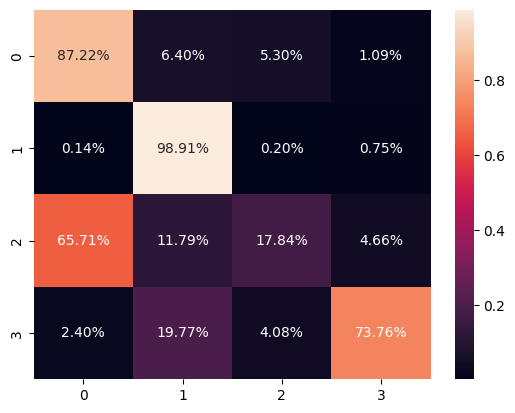

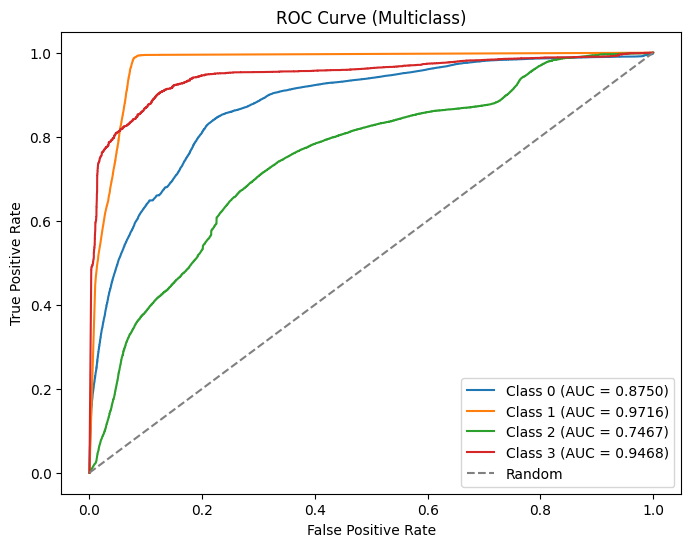

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_= m()
    model_.fit(X_train[:1000], y_train[:1000])
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
    plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
    plt.savefig('R-CF'+str(m)+'.jpg', dpi=300)
    plt.show()

    # ROC Curve and AUC for each class
    num_classes=4
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_proba=model_.predict_proba(X_test)
    y_true_one_hot = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curve for each class
    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

    plt.title('ROC Curve (Multiclass)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.savefig('R-ROC'+str(m)+'.jpg', dpi=300)
    plt.show()
    print('\033[31m###################- End -###################\033[0m')



#############################################
SVC
Test Accuracy :  72.94%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.72      0.98      0.83     85565
           1       0.80      0.40      0.54     19319
           2       0.76      0.01      0.02     18805
           3       0.96      0.49      0.65      6550

    accuracy                           0.73    130239
   macro avg       0.81      0.47      0.51    130239
weighted avg       0.75      0.73      0.66    130239

             Confusion_matrix 


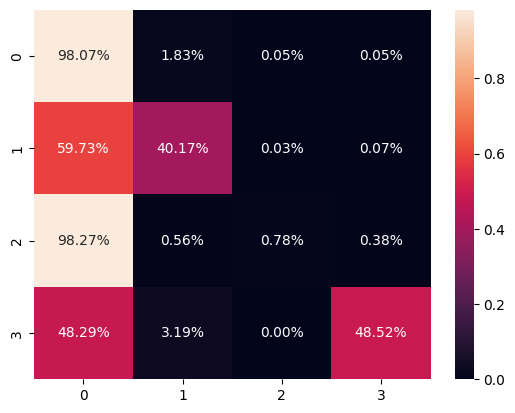

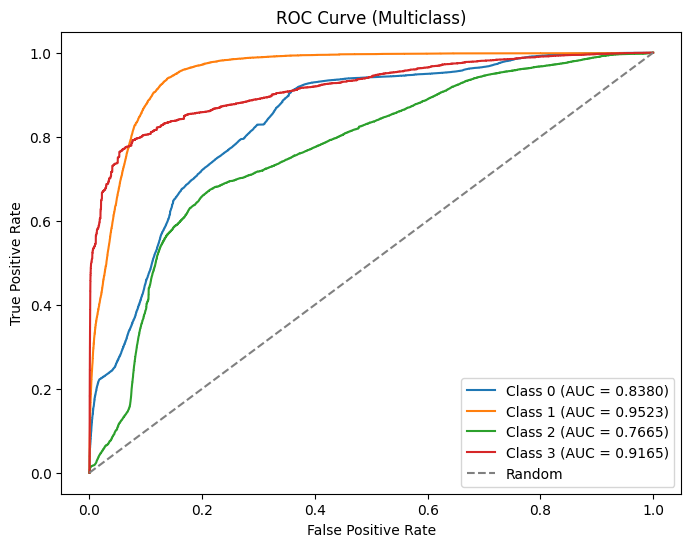

###################- End -###################


In [ ]:
print('#############################################')
print('SVC')
model_= SVC(probability=True)
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, pred))
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
plt.savefig('R-CF-SVC.jpg', dpi=300)
plt.show()

# ROC Curve and AUC for each class
num_classes=4
fpr = dict()
tpr = dict()
roc_auc = dict()
y_proba=model_.predict_proba(X_test)
y_true_one_hot = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

for i in range(num_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
     plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('R-ROC-SVC.jpg', dpi=300)
plt.show()
print('\033[31m###################- End -###################\033[0m')



#############################################
SGD
Test Accuracy :  78.09%  
              Classification_report 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.90      0.89     85565
           1       0.74      0.80      0.77     19319
           2       0.45      0.24      0.31     18805
           3       0.43      0.78      0.56      6550

    accuracy                           0.78    130239
   macro avg       0.62      0.68      0.63    130239
weighted avg       0.77      0.78      0.77    130239

             Confusion_matrix 


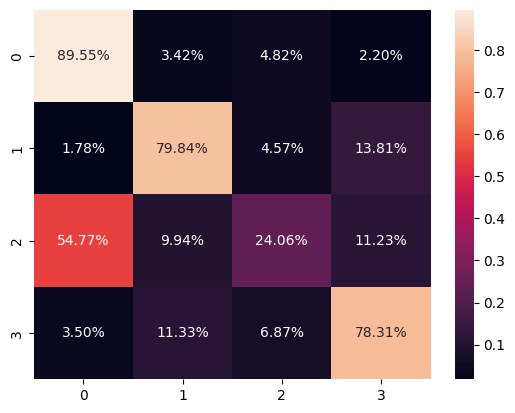

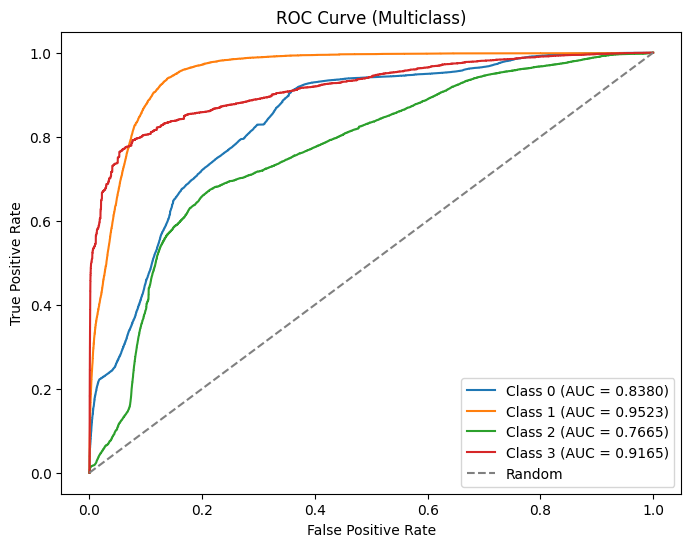

###################- End -###################


In [ ]:
print('#############################################')
print('SGD')
model_ = SGDClassifier(loss='log')
model_.fit(X_train[:1000], y_train[:1000])
pred = model_.predict(X_test)
acc = accuracy_score(pred, y_test)
accuracy_test.append(acc)
print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
print('\033[01m              Classification_report \033[0m')
print(classification_report(y_test, pred))
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_test, pred)
cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
plt.savefig('R-CF-SGD.jpg', dpi=300)
plt.show()

# ROC Curve and AUC for each class
num_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Remove NaN values from y_true_one_hot and y_proba
valid_indices = ~np.isnan(y_true_one_hot).any(axis=1) & ~np.isnan(y_proba).any(axis=1)
y_true_one_hot = y_true_one_hot[valid_indices]
y_proba = y_proba[valid_indices]

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('R-ROC-SGD.jpg', dpi=300)
plt.show()
print('\033[31m###################- End -###################\033[0m')



#CNN

In [ ]:
X=df[['url']]
y=df[['Category']]

In [ ]:
y = pd.get_dummies(y, columns=['Category'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, shuffle=True)

In [ ]:
tokenizer = Tokenizer(filters='', char_level=True, lower=False, oov_token=1)

# Fit only on training data
tokenizer.fit_on_texts(X_train['url'])
n_char = len(tokenizer.word_index.keys())

train_seq = tokenizer.texts_to_sequences(X_train['url'])
val_seq = tokenizer.texts_to_sequences(X_test['url'])

print('Before tokenization: ')
print(X_train.iloc[0]['url'])
print('\nAfter tokenization: ')
print(train_seq[0])


Before tokenization: 
'ssl.allegro.pl.cgb5.com/\%20/fnd/authentication/enter_login.html'

After tokenization: 
[76, 10, 10, 14, 12, 5, 14, 14, 2, 21, 11, 3, 12, 15, 14, 12, 9, 21, 22, 33, 12, 9, 3, 13, 6, 75, 32, 25, 24, 6, 26, 8, 16, 6, 5, 20, 4, 18, 2, 8, 4, 7, 9, 5, 4, 7, 3, 8, 6, 2, 8, 4, 2, 11, 37, 14, 3, 21, 7, 8, 12, 18, 4, 13, 14, 76]


In [ ]:
sequence_length = np.array([len(i) for i in train_seq])
sequence_length = np.percentile(sequence_length, 99).astype(int)
print(f'Before padding: \n {train_seq[0]}')
train_seq = pad_sequences(train_seq, padding='post', maxlen=sequence_length)
val_seq = pad_sequences(val_seq, padding='post', maxlen=sequence_length)
print(f'After padding: \n {train_seq[0]}')

Before padding: 
 [76, 10, 10, 14, 12, 5, 14, 14, 2, 21, 11, 3, 12, 15, 14, 12, 9, 21, 22, 33, 12, 9, 3, 13, 6, 75, 32, 25, 24, 6, 26, 8, 16, 6, 5, 20, 4, 18, 2, 8, 4, 7, 9, 5, 4, 7, 3, 8, 6, 2, 8, 4, 2, 11, 37, 14, 3, 21, 7, 8, 12, 18, 4, 13, 14, 76]
After padding: 
 [76 10 10 14 12  5 14 14  2 21 11  3 12 15 14 12  9 21 22 33 12  9  3 13
  6 75 32 25 24  6 26  8 16  6  5 20  4 18  2  8  4  7  9  5  4  7  3  8
  6  2  8  4  2 11 37 14  3 21  7  8 12 18  4 13 14 76  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
from tensorflow.keras import models

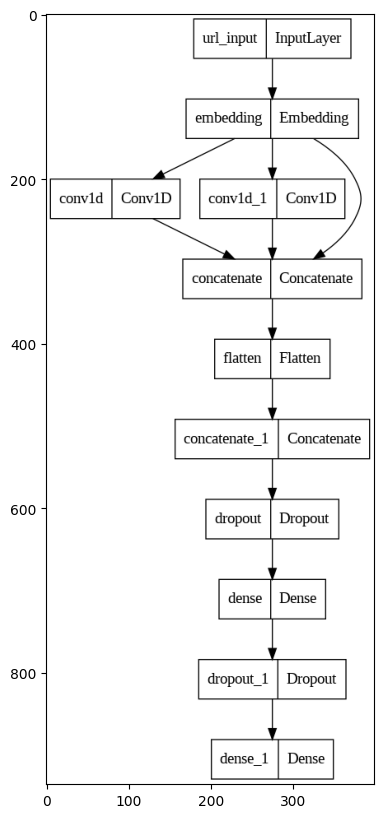

In [ ]:
def convolution_block(x):
    conv_3_layer = layers.Conv1D(64, 3, padding='same', activation='elu')(x)
    conv_5_layer = layers.Conv1D(64, 5, padding='same', activation='elu')(x)
    conv_layer = layers.concatenate([x, conv_3_layer, conv_5_layer])
    conv_layer = layers.Flatten()(conv_layer)
    return conv_layer


def create_model(sequence_length, n_char):
    input_layer = []

    # Sequence input layer
    sequence_input_layer = layers.Input(shape=(sequence_length,), name='url_input')
    input_layer.append(sequence_input_layer)

    # Convolution block
    char_embedding = layers.Embedding(n_char + 1, 32, input_length=sequence_length)(sequence_input_layer)
    conv_layer = convolution_block(char_embedding)

    # Concatenate all layers
    fc_layer = layers.concatenate([conv_layer])
    fc_layer = layers.Dropout(rate=0.5)(fc_layer)

    # Dense layer
    fc_layer = layers.Dense(128, activation='elu')(fc_layer)
    fc_layer = layers.Dropout(rate=0.2)(fc_layer)

    # Output layer for multiclass classification with 4 classes (use 'softmax' activation)
    output_layer = layers.Dense(4, activation='softmax')(fc_layer)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reset session
backend.clear_session()
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

# Create model
model = create_model(sequence_length, n_char)

# Show model architecture
plot_model(model, to_file='model.png')
model_image = mpimg.imread('model.png')
plt.figure(figsize=(10, 10))
plt.imshow(model_image)
plt.savefig('CNN.jpg', dpi=300)
plt.show()


In [ ]:
# Create train data
train_x = [train_seq]


In [ ]:
# Model training
early_stopping = [EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max')]
history = model.fit(train_x, y_train, batch_size=64, epochs=25, verbose=1, validation_split=0.2, shuffle=True, callbacks=early_stopping)

model.save('model.h5')

Epoch 1/25
6512/6512 [==============================] - 80s 10ms/step - loss: 0.1933 - accuracy: 0.9357 - val_loss: 0.1234 - val_accuracy: 0.9607
Epoch 2/25
6512/6512 [==============================] - 62s 9ms/step - loss: 0.1302 - accuracy: 0.9585 - val_loss: 0.1084 - val_accuracy: 0.9650
Epoch 3/25
6512/6512 [==============================] - 54s 8ms/step - loss: 0.1142 - accuracy: 0.9632 - val_loss: 0.1082 - val_accuracy: 0.9666
Epoch 4/25
6512/6512 [==============================] - 54s 8ms/step - loss: 0.1039 - accuracy: 0.9666 - val_loss: 0.1022 - val_accuracy: 0.9688
Epoch 5/25
6512/6512 [==============================] - 55s 8ms/step - loss: 0.0976 - accuracy: 0.9685 - val_loss: 0.0995 - val_accuracy: 0.9702
Epoch 6/25
6512/6512 [==============================] - 51s 8ms/step - loss: 0.0920 - accuracy: 0.9702 - val_loss: 0.0962 - val_accuracy: 0.9712
Epoch 7/25
6512/6512 [==============================] - 60s 9ms/step - loss: 0.0882 - accuracy: 0.9715 - val_loss: 0.1027 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
val_x = [val_seq]


val_pred = model.predict(val_x)
val_pred = np.argmax(val_pred, axis = 1)


4070/4070 [==============================] - 9s 2ms/step


In [ ]:
print(val_pred)

[0 0 2 ... 2 0 0]


In [ ]:
y_test= y_test.idxmax(axis=1)

In [ ]:
y_test = y_test.str.extract('(\d+)').astype(int)
y_test= y_test.values.ravel()

In [ ]:
print(f'\n\nClassification Report:\n{classification_report(y_test, val_pred)}')




Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     85615
           1       0.98      1.00      0.99     19440
           2       0.94      0.88      0.91     18764
           3       0.98      0.95      0.96      6420

    accuracy                           0.97    130239
   macro avg       0.97      0.95      0.96    130239
weighted avg       0.97      0.97      0.97    130239



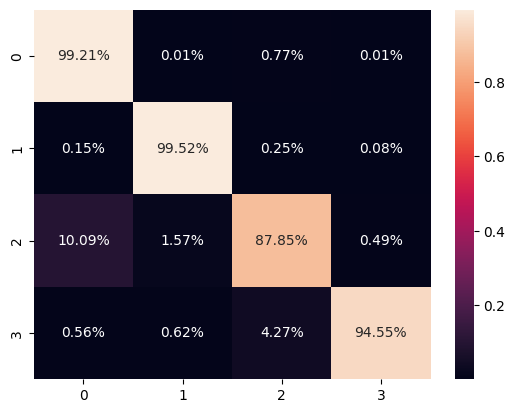

In [ ]:
cf_matrix = confusion_matrix(y_test, val_pred)
cf_matrix_normalized = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]
plot_ = sns.heatmap(cf_matrix_normalized, annot=True, fmt='0.2%')
plt.savefig('CF-CNN.jpg', dpi=300)
plt.show()

4070/4070 [==============================] - 10s 2ms/step


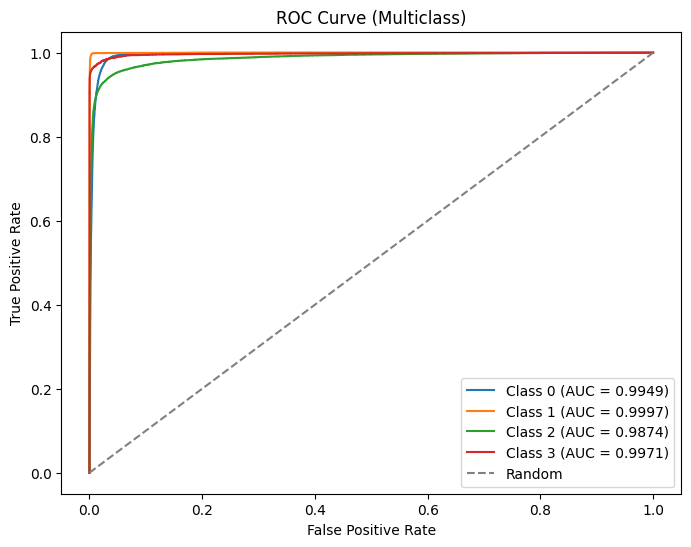

###################- End -###################


In [ ]:
# ROC Curve and AUC for each class
num_classes=4
fpr = dict()
tpr = dict()
roc_auc = dict()
y_proba=model.predict(val_x)
y_true_one_hot = label_binarize(y_test, classes=list(range(y_proba.shape[1])))

for i in range(num_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
     plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('ROC-CNN.jpg', dpi=300)
plt.show()
print('\033[31m###################- End -###################\033[0m')
